# Data Mining: Harry Potter Sorting Hat

Studente: Aloisio Chiara Ludovica
Matricola: 239648

Harry Potter è una serie di romanzi fantasy scritta da J.K. Rowling che segue le avventure di un giovane mago, Harry, mentre frequenta la Scuola di Magia e Stregoneria di Hogwarts e affronta il potente mago oscuro Lord Voldemort.

In [4]:
from IPython.display import Image
Image(url="https://cdn.wallpapersafari.com/39/28/s9IzxG.jpg", width=800)


Come sceglie le casate il Cappello Parlante?
Il Cappello Parlante è un cappello magico che smista gli studenti nelle quattro casate di Hogwarts: Grifondoro, Serpeverde, Corvonero e Tassorosso. Durante la Cerimonia di Smistamento, il cappello viene posto sulla testa dello studente e legge nella sua mente desideri, qualità e potenziale. In base a ciò che trova, decide la casata più adatta. Si basa principalmete su alcune caratteristiche più rilevanti quali, ad esempio l'eredità genetica dei genitori, il coraggio, l'intelligenza, la lealtà, l'ambizione, la conoscenza delle arti oscure, abilità el giocare a quidditch, abilità nei duelli e creatività.

In [5]:
from IPython.display import Image
Image(url="https://th.bing.com/th/id/OIP.gfkCacIGJu_4w9Q08F8G9gHaFu?rs=1&pid=ImgDetMain", width=800)

Il dataset con il quale si è deciso di lavorare raccoglie le informazioni di streghe e maghi puramente frutto dell'immaginazione ispirati dal magico mondo di Harry Potter.
Il dataset contiene informazioni riguardo abilità e peculiarità degli studenti della scuola di magia e stregoneria di Hogwarts. Viene fatto riferimento a questo dataset:
https://www.kaggle.com/datasets/sahityapalacharla/harry-potter-sorting-dataset

_Attributi_
Gli attributi di tale dataset sono alquanto esplici:
- Blood Status
- Bravery
- Intelligence
- Loyalty
- Ambition
- Dark Arts Knowledge
- Quidditch Skills
- Dueling Skills
- Creativity

E l'etichetta di classe 'House' che assume valori:
- Slytherin
- Ravenclaw
- Hufflepuff
- Gryffindor

L'obiettivo del seguente studio sarà, dunque, dopo aver studiato il dataset, quello di predire la casata di uno studente della scuola di magia e stregoneria di Hogwarts attraverso modelli di classificazione e clustering.

# Setup

In [6]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Tavola colori personalizzata per ogni casata
hue_palette = {
    "Gryffindor": "#D62828",
    "Ravenclaw": "#003049",
    "Hufflepuff": "#F4D35E",
    "Slytherin": "#3A5A40"
}
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


## Get Data

In [7]:
studenti = pd.read_csv('harry_potter_1000_students.csv')

Diamo un'occhiata veloce ai nostri dati

In [8]:
studenti.head()

,Blood Status,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity,House
0,Half-blood,9,4,7,5,0,8,8,7,Gryffindor
1,Muggle-born,6,8,5,7,5,6,4,9,Ravenclaw
2,Pure-blood,1,4,7,7,1,4,4,6,Hufflepuff
3,Pure-blood,9,1,3,4,1,9,10,1,Gryffindor
4,Muggle-born,5,9,7,3,3,6,7,9,Ravenclaw


In [9]:
studenti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Blood Status         1000 non-null   object
 1   Bravery              1000 non-null   int64 
 2   Intelligence         1000 non-null   int64 
 3   Loyalty              1000 non-null   int64 
 4   Ambition             1000 non-null   int64 
 5   Dark Arts Knowledge  1000 non-null   int64 
 6   Quidditch Skills     1000 non-null   int64 
 7   Dueling Skills       1000 non-null   int64 
 8   Creativity           1000 non-null   int64 
 9   House                1000 non-null   object
dtypes: int64(8), object(2)
memory usage: 78.3+ KB


Alcune osservazioni:
1. Il data set risulta essere troppo semplice e con pochi record
2. Non necessita di data cleaning, necessario per obiettivi didattici

Si decide dunque di modificare il data set utilizzando tecniche di _Data Augmentation_, ovvero tecniche utilizzate per aumentare la quantità di dati aggiungendo copie leggermente modificate di dati già esistenti o creando nuovi dati sintetici a partire da dati esistenti. Viene utilizzato per affrontare la diversità dei dati di addestramento, la quantità di dati e il problema del bilanciamento tra le classi nei compiti di classificazione. L'aumento dei dati funge da regolarizzatore e aiuta a ridurre l'overfitting durante l'addestramento di un modello di apprendimento automatico. L'intento principale è quello di aggiungere record che siano affini a quelli già presenti nel dataset. Si è pensato poi di aggiungere altre colonne, quali:

- Name
- Surname
- Age
- ID

Per rendere più interessante l'esplorazione dei dati.
Nella scelta di nomi, età e id si è fatto totale affidamento alla libreria _faker_, mentre per i cognomi si è fatto un lavoro leggermente diverso: guardando ai personaggi della nota saga, si evince una forte correlazione tra alcuni cognomi e alcune casate, perciò si è deciso di mantenere tale relazione forzando l'inserimento di tali cognomi e la relativa casata obbligatoria.

Infine, si è proceduto andando a "sporcare" i dataset aggiungendo valori null casuali per in 5% del totale dei singoli campi

In [10]:
#import pandas as pd
#import numpy as np
#import random
#from faker import Faker

#fake = Faker()
#target_records = 20000
#current_records = len(studenti)
#needed = target_records - current_records

# Mappa dei cognomi legati a casate specifiche
#surname_house_map = {
#    "Weasley": "Gryffindor",
#    "Malfoy": "Slytherin",
#    "Lovegood": "Ravenclaw",
#    "Diggory": "Hufflepuff"
#}
#surnames = list(surname_house_map.keys()) + [fake.last_name() for _ in range(100)]

# Funzione per creare un nuovo record
#def generate_augmented_record(base_row):
#    row = base_row.copy()
#    surname = random.choice(surnames)
#    name = fake.first_name()
#    house = surname_house_map.get(surname, base_row['House'])
#    age = random.randint(11, 18)
#    uid = fake.uuid4()

    # Variazioni sui valori numerici
#    for col in studenti.columns:
#        if studenti[col].dtype != object:
#            row[col] = int(np.clip(row[col] + np.random.randint(-2, 3), 0, 10))
#
#    row['Name'] = name
#    row['Surname'] = surname
#    row['House'] = house
#    row['Age'] = age
#   row['ID'] = uid
#    return row

# Generazione record
#augmented = [generate_augmented_record(studenti.iloc[i % current_records]) for i in range(needed)]
#df_aug = pd.DataFrame(augmented)

# Aggiunta attributi anche alle righe originali
#def enrich_original(row):
#    surname = random.choice(surnames)
#    return pd.Series({
#        'Name': fake.first_name(),
#        'Surname': surname,
#        'Age': random.randint(11, 18),
#        'ID': fake.uuid4(),
#        'House': surname_house_map.get(surname, row['House'])
#    })

#enriched = studenti.apply(enrich_original, axis=1)
#studenti.update(enriched)

# Unione finale
#df_final = pd.concat([studenti, df_aug], ignore_index=True)

# Introduzione di NaN
#def insert_missing_values(df, columns, missing_percentage=0.05):
#    n_rows = len(df)
#    for col in columns:
#        n_missing = int(n_rows * missing_percentage)
#        missing_indices = np.random.choice(n_rows, n_missing, replace=False)
#        df.loc[missing_indices, col] = np.nan
#
# Colonne su cui introdurre null
# columns_with_missing = ['Bravery', 'Intelligence', 'Quidditch Skills', 'Age', 'Surname']
# insert_missing_values(df_final, columns_with_missing, missing_percentage=0.05)

# Salvataggio
# df_final.to_csv("augmented_hogwarts.csv", index=False)
# print("Dataset salvato come 'augmented_hogwarts.csv' con", len(df_final), "record.")


In [11]:
studenti = pd.read_csv('augmented_hogwarts.csv')

In [12]:
studenti["Blood Status"].value_counts()

Blood Status
Half-blood     7100
Pure-blood     6640
Muggle-born    6260
Name: count, dtype: int64

In [13]:
studenti["House"].value_counts()

House
Slytherin     5298
Ravenclaw     5134
Hufflepuff    5010
Gryffindor    4558
Name: count, dtype: int64

In [14]:
studenti["Name"].value_counts()

Name
Michael     439
David       297
John        292
James       278
Robert      268
           ... 
Gene          1
Lacey         1
Ross          1
Gilbert       1
Franklin      1
Name: count, Length: 685, dtype: int64

In [15]:
studenti["Surname"].value_counts()

Surname
Williams    506
Johnson     500
Martinez    366
Jenkins     365
Green       360
           ... 
Lovegood    155
Hartman     154
Vance       153
Kim         152
Beard       140
Name: count, Length: 90, dtype: int64

Andiamo a vedere con sono distribuiti i dati


In [16]:
studenti.describe()

,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity,Age
count,19000.000000,19000.000000,20000.000000,20000.000000,20000.000000,19000.000000,20000.000000,20000.000000,18055.000000
mean,4.997211,5.253737,5.096050,5.099800,4.088500,5.465105,6.151350,5.176600,14.497591
std,2.882097,2.855280,2.877766,2.908739,3.144068,2.893907,2.980937,2.927224,2.306805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,12.000000
50%,5.000000,5.000000,5.000000,5.000000,3.000000,6.000000,7.000000,5.000000,14.000000
75%,7.000000,8.000000,7.000000,7.000000,6.000000,8.000000,9.000000,8.000000,17.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,18.000000


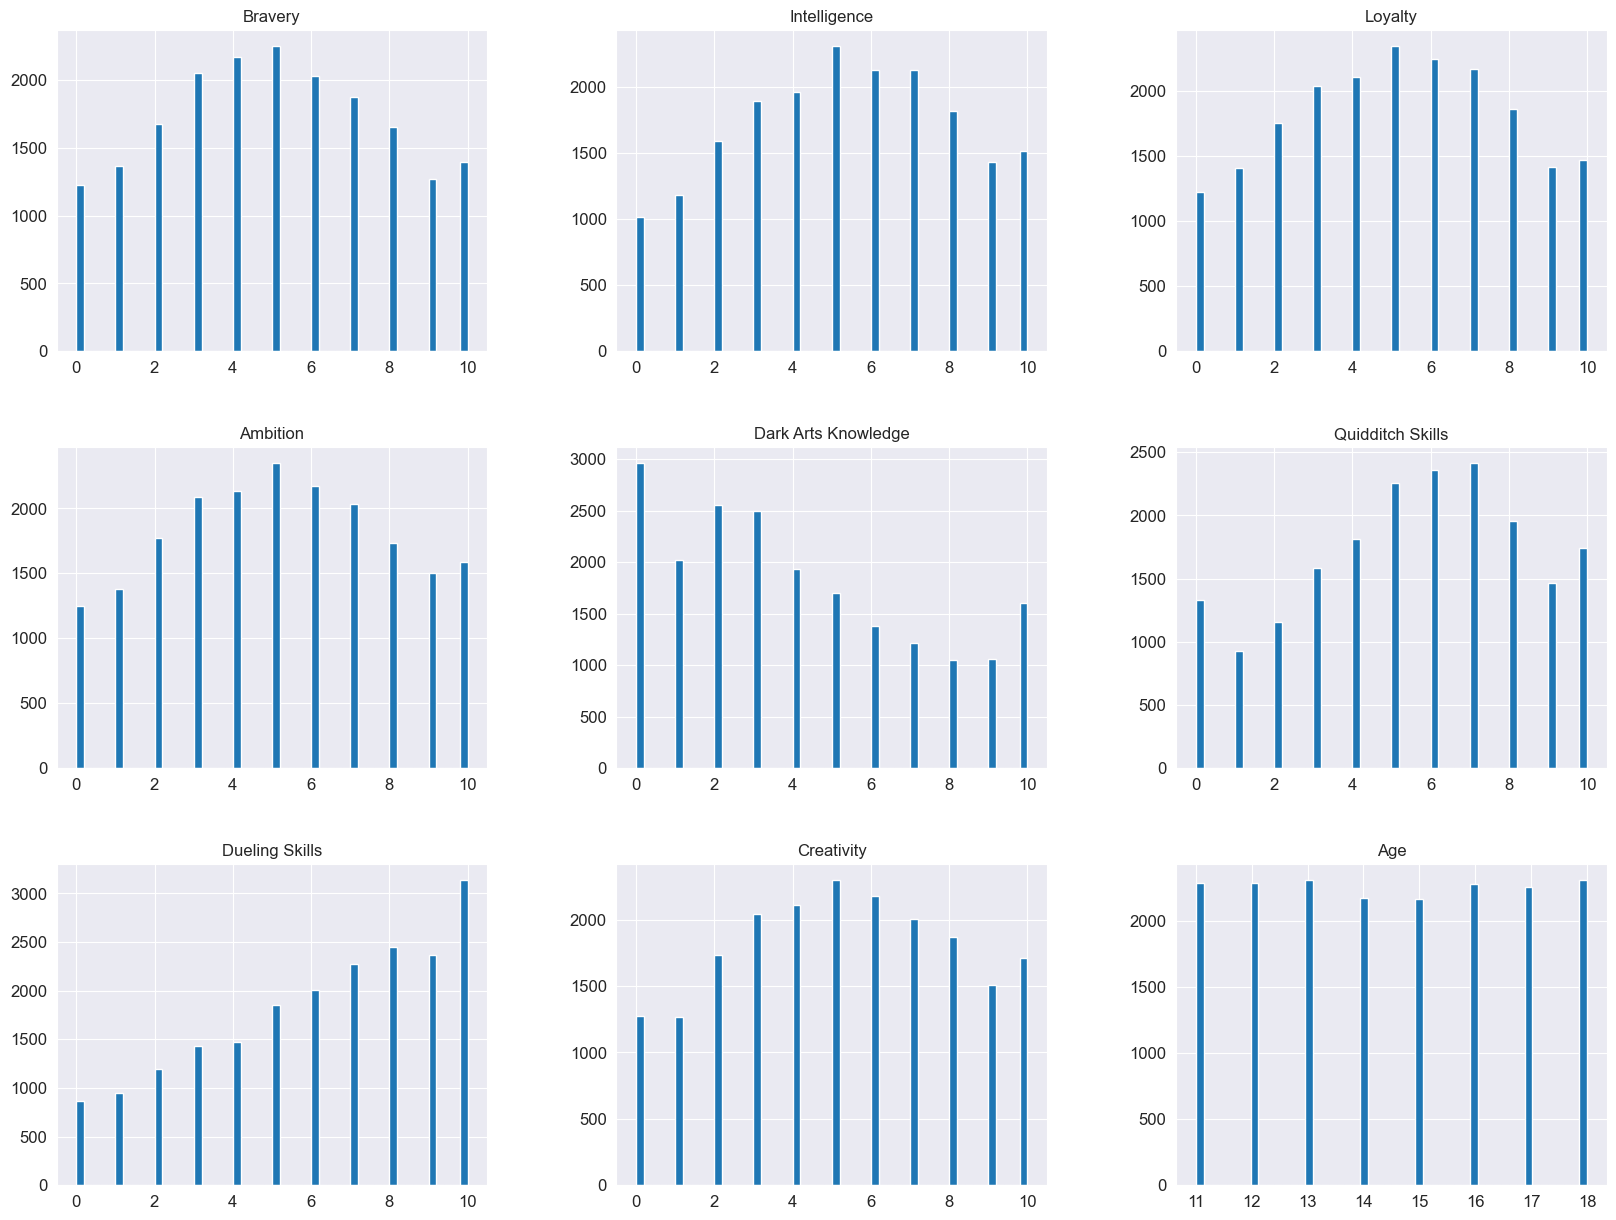

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

studenti.hist(bins=50, figsize=(20,15))
plt.show()


Alcune considerzioni:
### 1. Distribuzione dello Status di Sangue
* La popolazione si suddivide principalmente in tre categorie: *Muggle-born*, *Half-blood* e *Pure-blood*.
* Le frequenze relative sono abbastanza equilibrate, con una lieve prevalenza per *Pure-blood* e *Muggle-born* rispetto agli *Half-blood*, suggerendo una rappresentanza bilanciata ma con alcune leggere predominanze.

### 2. Tratti Individuali (Valori da 0 a 10)
Per le seguenti caratteristiche, si notano diverse tendenze nelle distribuzioni:
* **Bravery (Coraggio)**: la distribuzione è unimodale con un picco intorno a 5-6, suggerendo che il coraggio sia mediamente sviluppato nella popolazione.
* **Intelligence (Intelligenza)**: ha una distribuzione simile a quella del coraggio, ma leggermente spostata verso destra, con un picco a 5-6 e una buona presenza anche nei valori alti, indicando un'intelligenza generalmente elevata.
* **Loyalty (Lealtà)**: mostra una distribuzione simmetrica con un picco ben definito a 5-6, indice di una lealtà moderatamente diffusa.
* **Ambition (Ambizione)**: presenta un andamento simile alla lealtà, con un picco a 4-5 ma un decremento più marcato dopo il valore 6.
* **Dark Arts Knowledge (Conoscenza delle Arti Oscure)**: decresce drasticamente all’aumentare del punteggio, segno che la maggior parte degli studenti ha scarsa o nulla familiarità con le Arti Oscure.
* **Quidditch Skills (Abilità nel Quidditch)**: mostra una distribuzione moderatamente spostata verso i valori alti (picco tra 5 e 6), indicando buone competenze sportive nella media degli studenti.
* **Dueling Skills (Abilità nel Duello)**: distribuzione in crescita, con più studenti dotati nei livelli alti; ciò potrebbe indicare una valorizzazione di tali abilità all’interno della scuola.
* **Creativity (Creatività)**: presenta una forma più piatta, con leggeri picchi attorno a 4 e 6, suggerendo una variabilità significativa nella popolazione.

### 3. Distribuzione per Casa
* Le quattro Case (Slytherin, Gryffindor, Hufflepuff, Ravenclaw) sono pressoché equamente rappresentate, con lievi variazioni numeriche che potrebbero essere considerate trascurabili in un’analisi generale.

### 4. Frequenza di Nomi e Cognomi
* Le distribuzioni di *Name* e *Surname* mostrano forti sbilanciamenti: pochi nomi/cognomi ricorrono con alta frequenza, mentre la maggior parte sono poco comuni.
* Questo suggerisce la presenza di personaggi o famiglie dominanti nel dataset, coerente con l’universo narrativo di riferimento dove alcune famiglie (es. Malfoy, Potter, Weasley) sono centrali.

In [18]:
studenti = studenti.drop(['ID', 'Age'], axis=1)

# Creazione Test Set e Training Set


In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(studenti, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16000, 12), (4000, 12))

Dividere i dati (splitting the data) è un compito delicato e cruciale perché da esso dipende l'affidabilità del modello predittivo. Ecco perché:
1. **Evita l'overfitting**: Se alleni il modello su tutti i dati disponibili, rischi che impari troppo bene i dettagli specifici del dataset (rumore incluso), perdendo la capacità di generalizzare su dati nuovi.
2. **Valutazione onesta**: Separare i dati in **training** e **test** permette di valutare le prestazioni del modello su dati mai visti prima, simulando come si comporterà nel mondo reale.
3. **Distribuzione coerente**: Se la divisione non è fatta correttamente (es. in modo casuale ma sbilanciato), si rischia che il modello sia allenato o testato su insiemi di dati non rappresentativi, portando a risultati fuorvianti.
4. **Evitare leakage**: Una divisione scorretta può causare data leakage, cioè quando informazioni dal test set "trapelano" nel training set, gonfiando artificialmente le prestazioni del modello.


Per capire se il test set è ben costruito, andiamo a vedere le la distribuzione di tale forma simile della distribuzione del train set

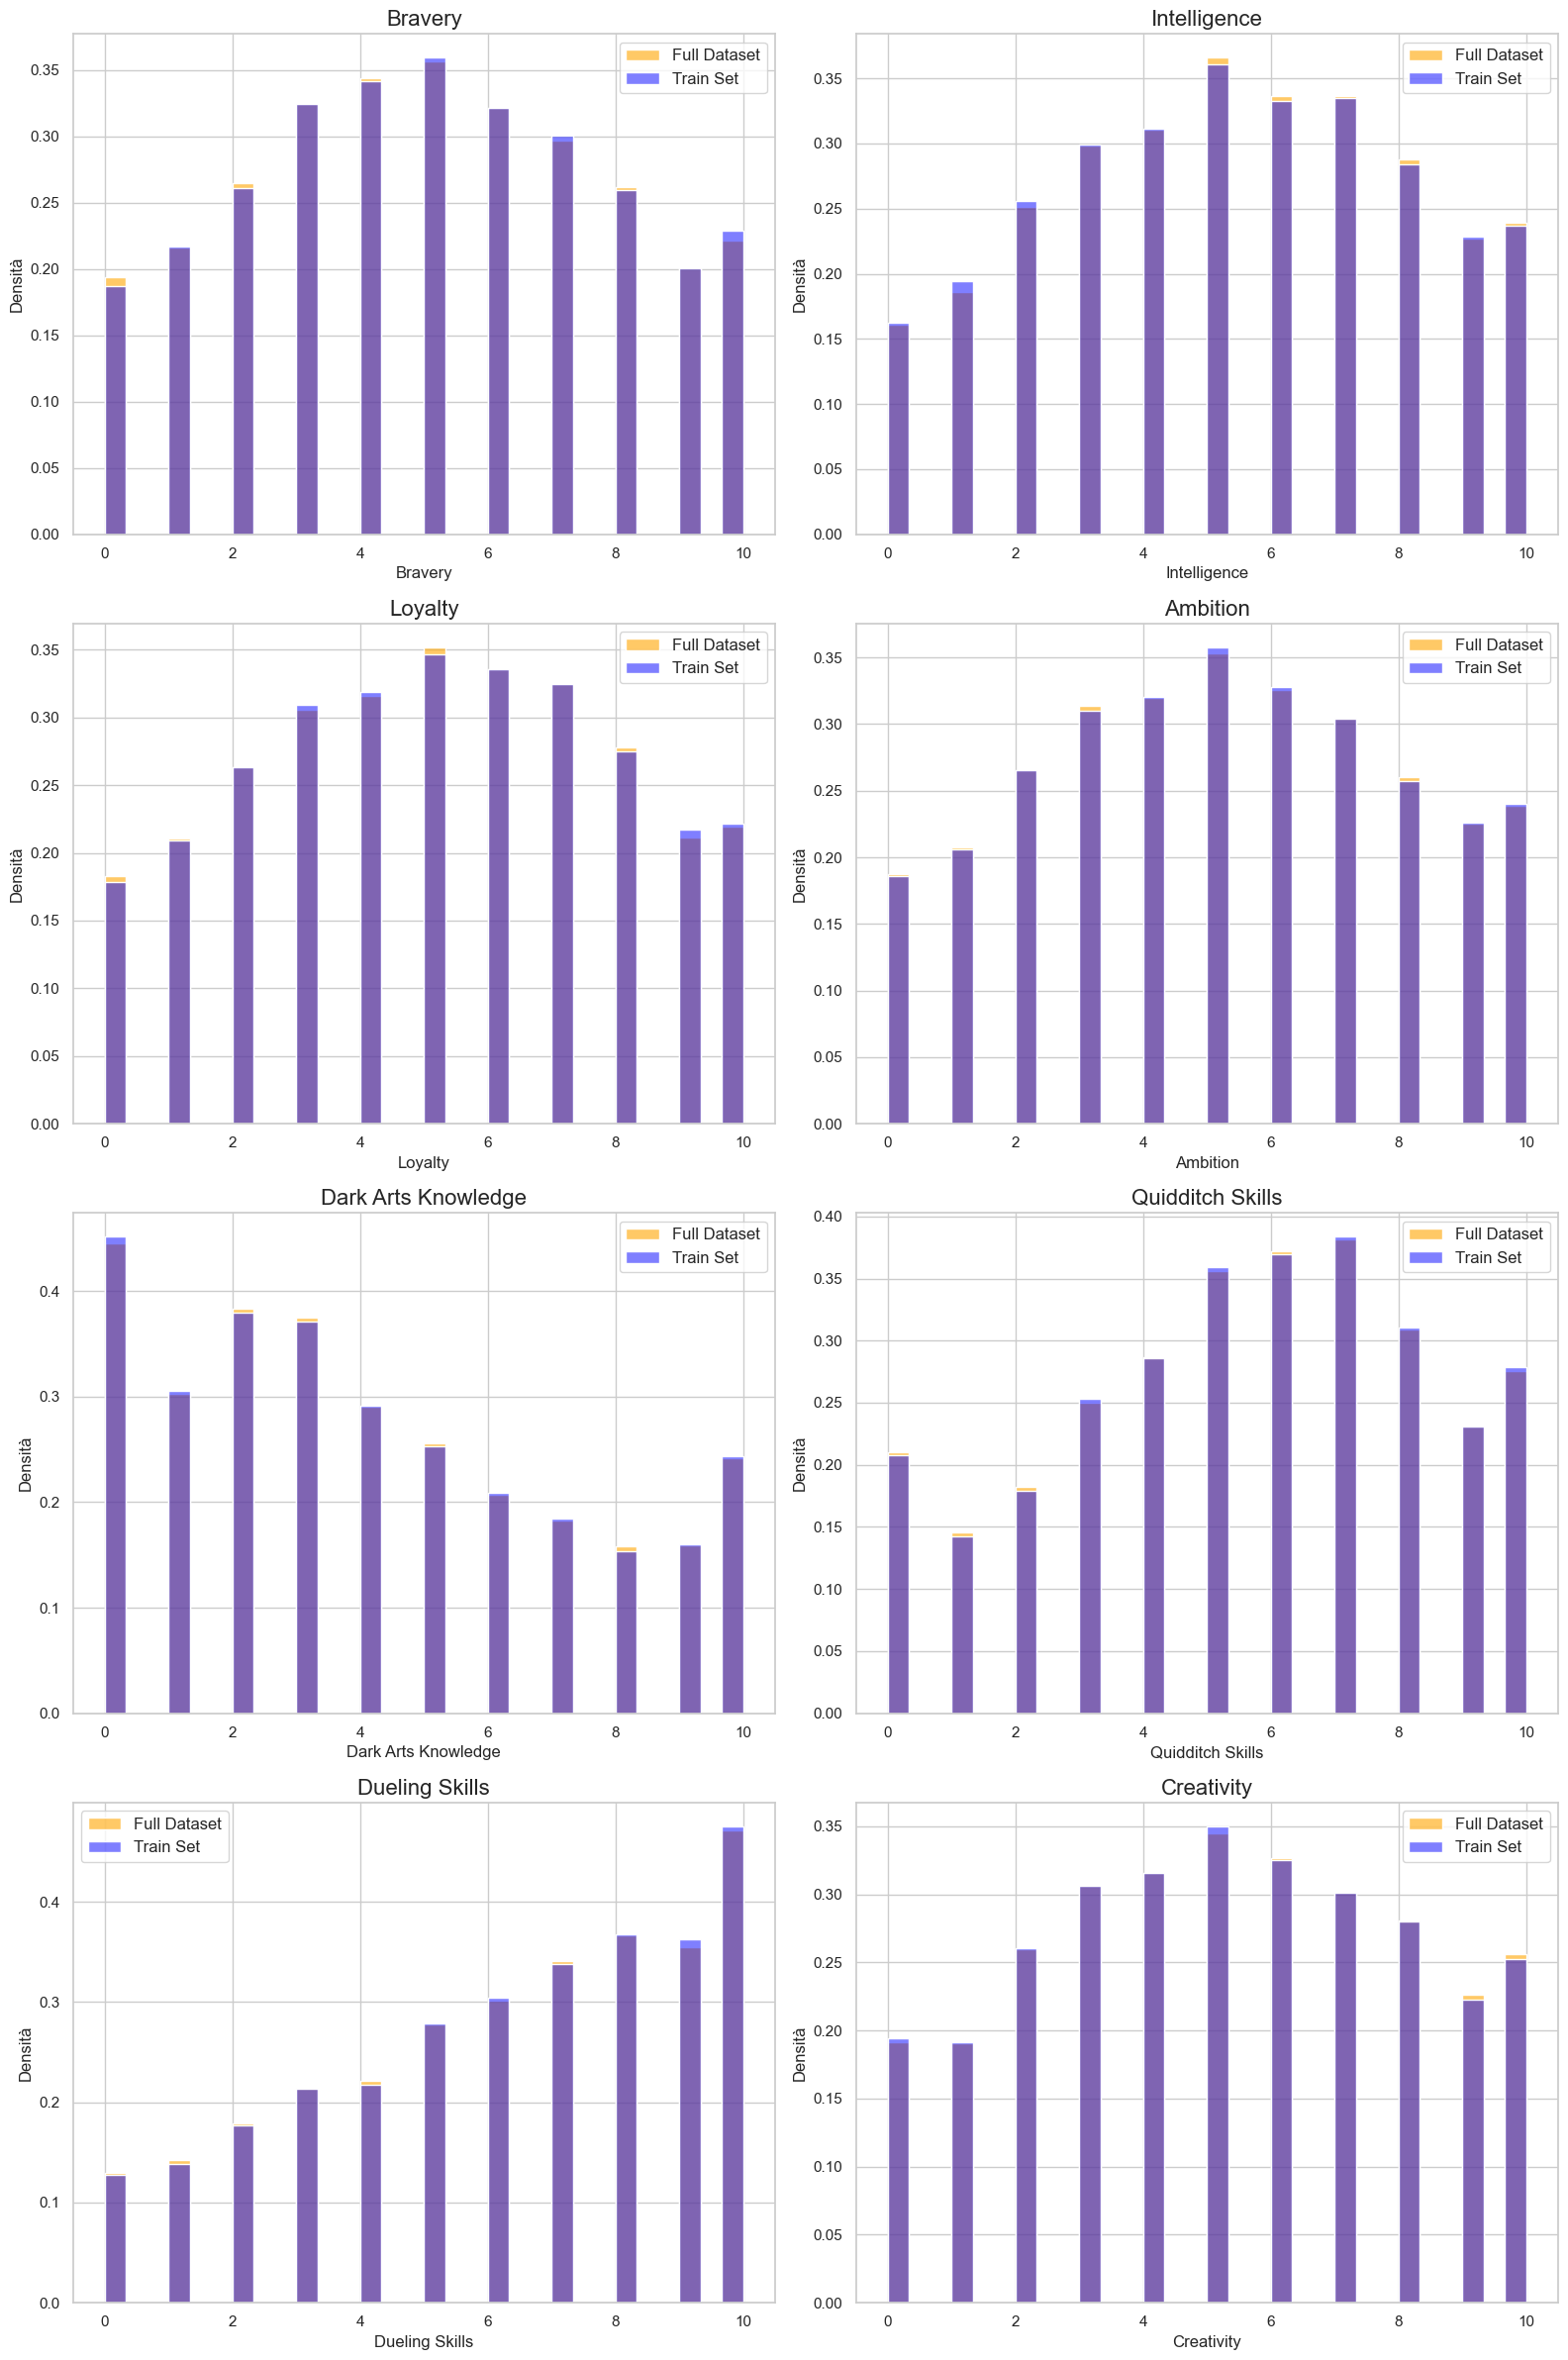

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Attributi da confrontare
attributes = [
    'Bravery', 'Intelligence', 'Loyalty', 'Ambition', 'Dark Arts Knowledge',
    'Quidditch Skills', 'Dueling Skills', 'Creativity'
]

# Rendiamo leggibile gli istogrammi
sns.set(style="whitegrid")
n_cols = 2
n_rows = (len(attributes) + 1) // n_cols
plt.figure(figsize=(16, n_rows * 6))

for i, attr in enumerate(attributes):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(studenti[attr], color='orange', label='Full Dataset', kde=False, stat='density', alpha=0.6, bins=30)
    sns.histplot(train_set[attr], color='blue', label='Train Set', kde=False, stat='density', alpha=0.5, bins=30)
    plt.title(attr, fontsize=16)
    plt.xlabel(attr, fontsize=12)
    plt.ylabel('Densità', fontsize=12)
    plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


Le distribuzioni sembrano abbastanza equivalenti, dunque train set e test set sono ben bilanciati.

# Scoperta e Visualizzazione dei dati
Fare plotting dei dati è sicuramente i modo migliore per visualizzare e capire pattern significativi sul dataset.
E' buona norma lavorare sempre per copia dei dati, e così faremo.

In [21]:
studenti = train_set.copy()


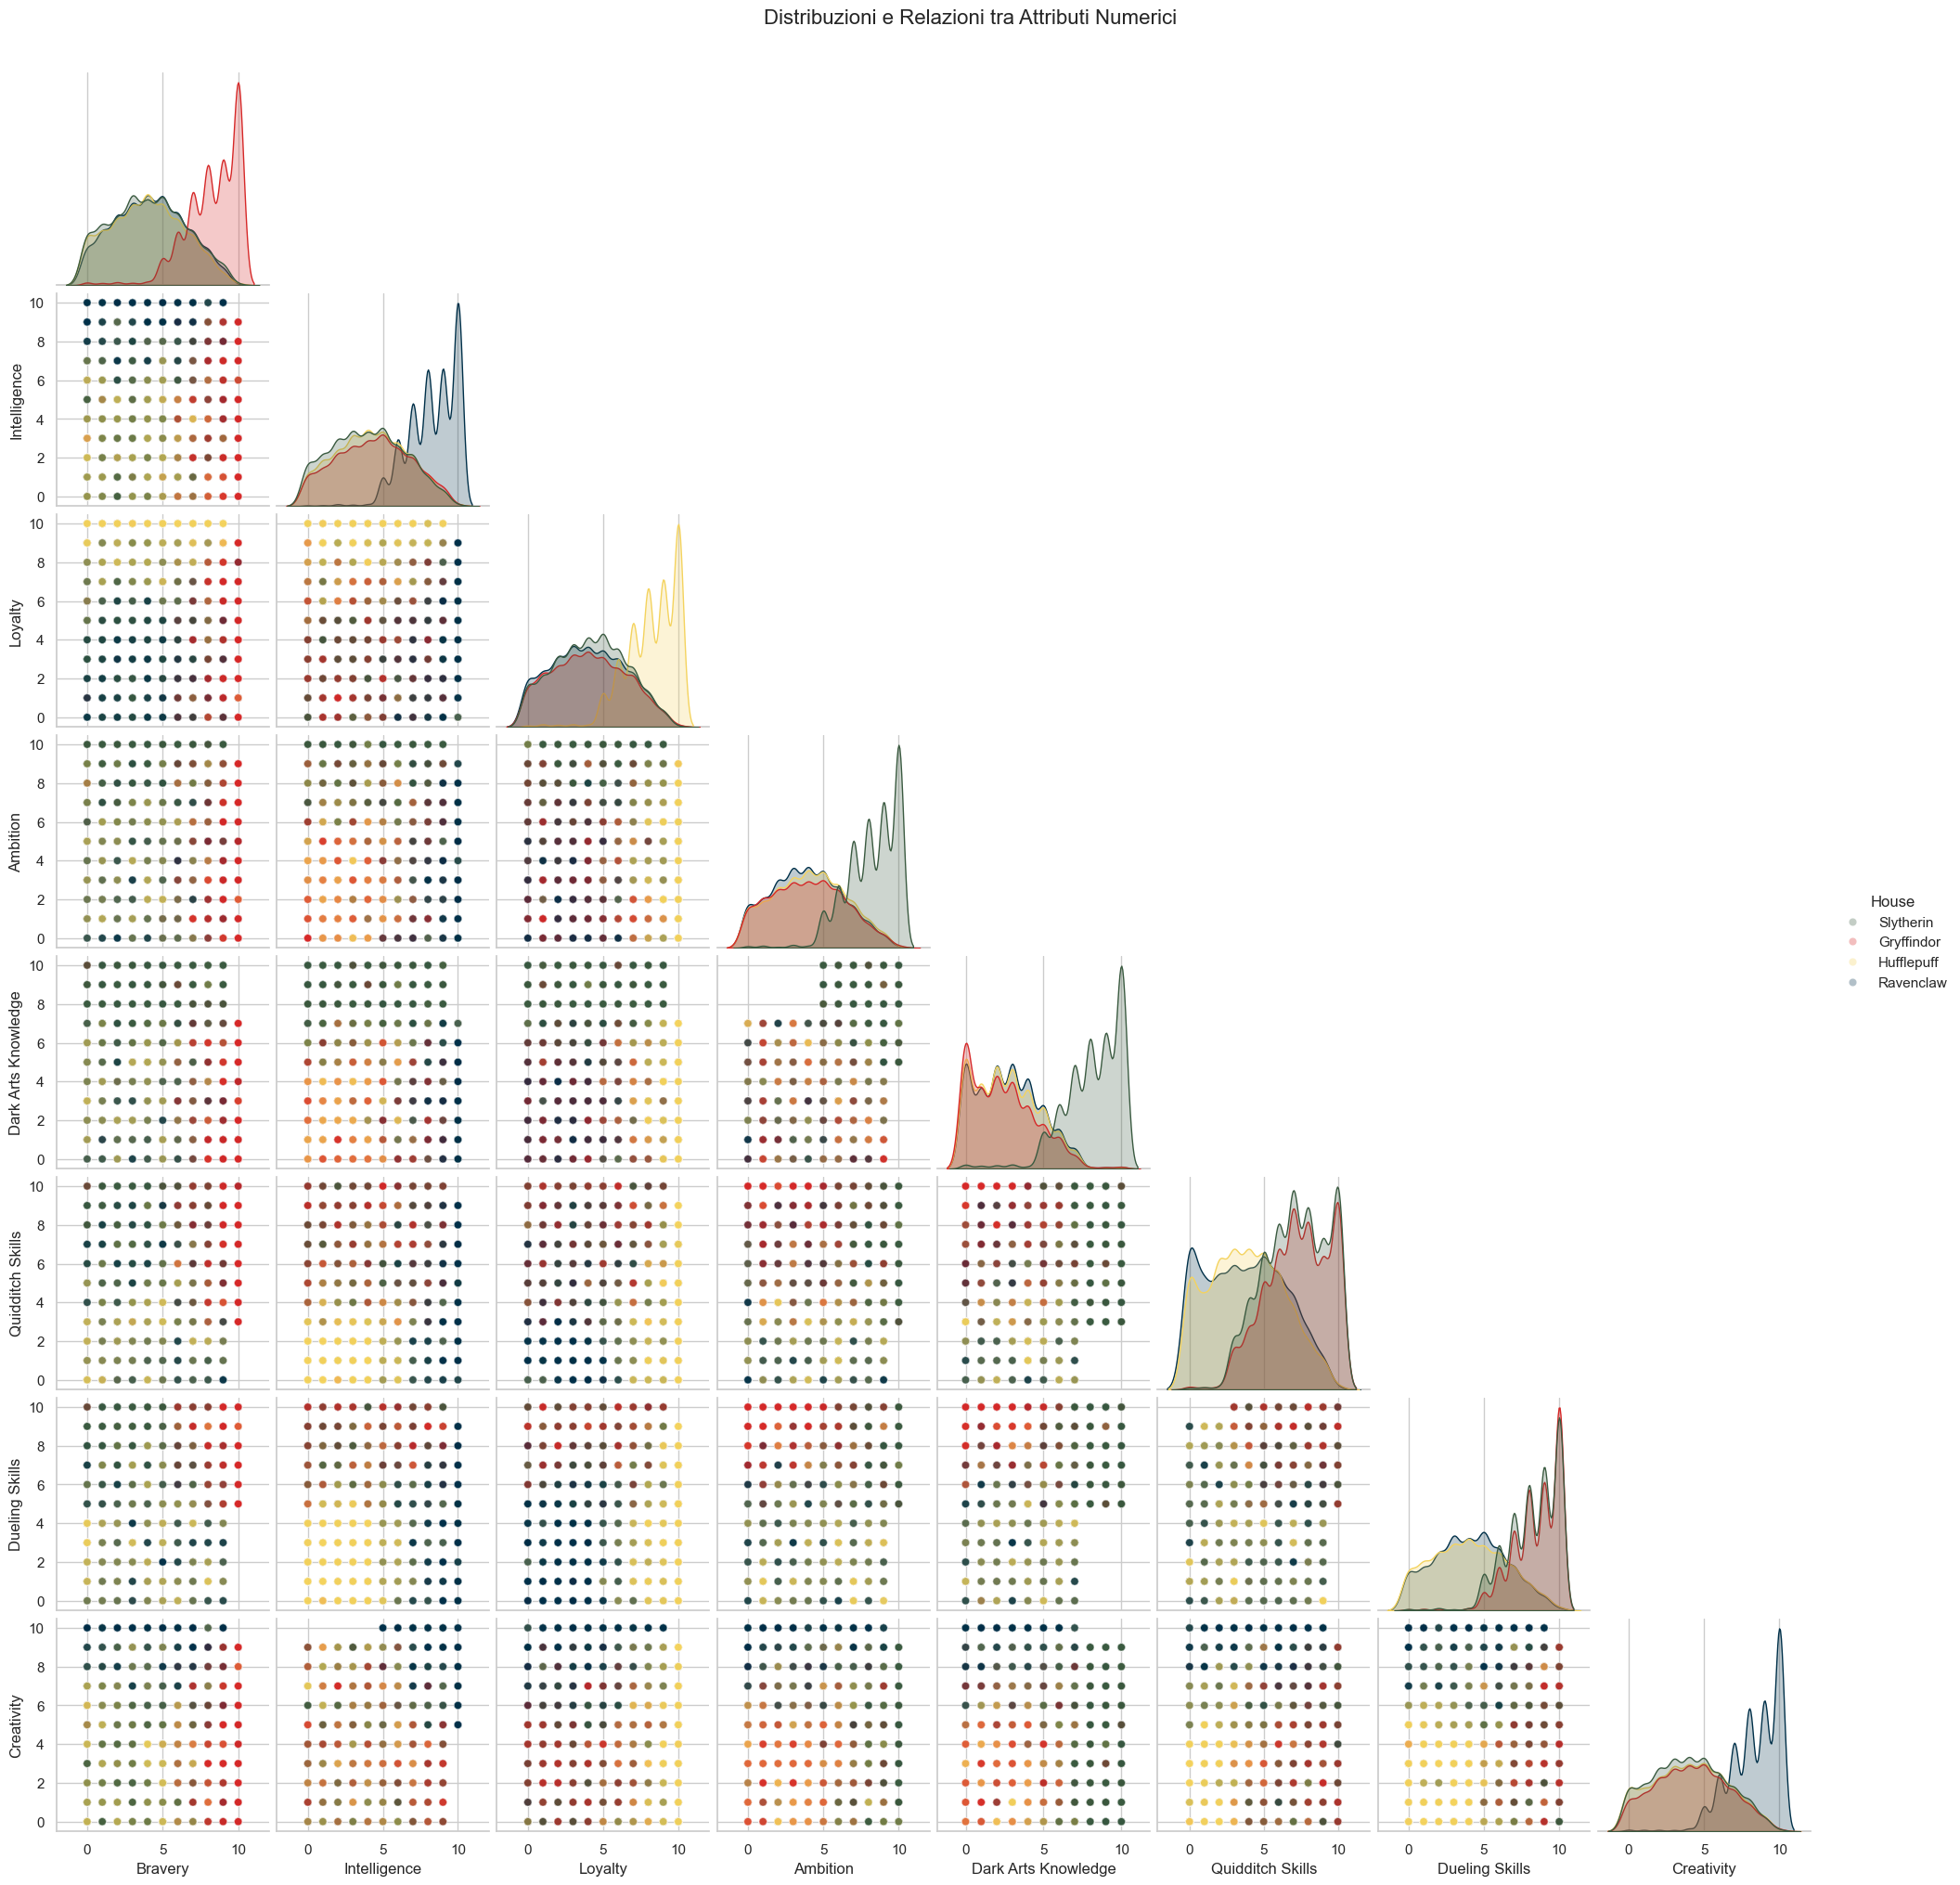

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selezione delle colonne numeriche
numerical_cols = [
    'Bravery', 'Intelligence', 'Loyalty', 'Ambition',
    'Dark Arts Knowledge', 'Quidditch Skills',
    'Dueling Skills', 'Creativity'
]

data = studenti[numerical_cols + ['House']]

# Pairplot
sns.pairplot(
    data,
    hue='House',
    palette=hue_palette,
    corner=True,
    diag_kind='kde',
    plot_kws={'alpha': 0.3})
plt.suptitle("Distribuzioni e Relazioni tra Attributi Numerici", y=1.02, fontsize=16)
plt.show()



### **Cosa possiamo osservare?**

1. **Distribuzioni distinte:**

   * **Slytherin** si distingue per valori alti di *Ambition* e *Dark Arts Knowledge*.
   * **Gryffindor** mostra alta *Bravery* e buone *Dueling Skills*.
   * **Ravenclaw** domina in *Intelligence* e *Creativity*.
   * **Hufflepuff** è forte in *Loyalty* e *Quidditch Skills*.

2. **Relazioni tra attributi:**

   * C’è una correlazione visibile tra *Ambition* e *Dark Arts Knowledge* (positiva).
   * *Bravery* e *Dueling Skills* sembrano correlate, soprattutto in Gryffindor.
   * *Intelligence* e *Creativity* vanno spesso insieme in Ravenclaw.

3. **Separabilità tra Case:**

   * Alcune Case si distinguono chiaramente in certi spazi (es. *Ambition* vs *Loyalty* mostra una netta distinzione tra Slytherin e Hufflepuff).
   * Altre Case si sovrappongono di più, ad esempio nei valori di *Quidditch Skills*.



Andiamo a vedere con ogni attributo influenza l'appartenenza alla casa

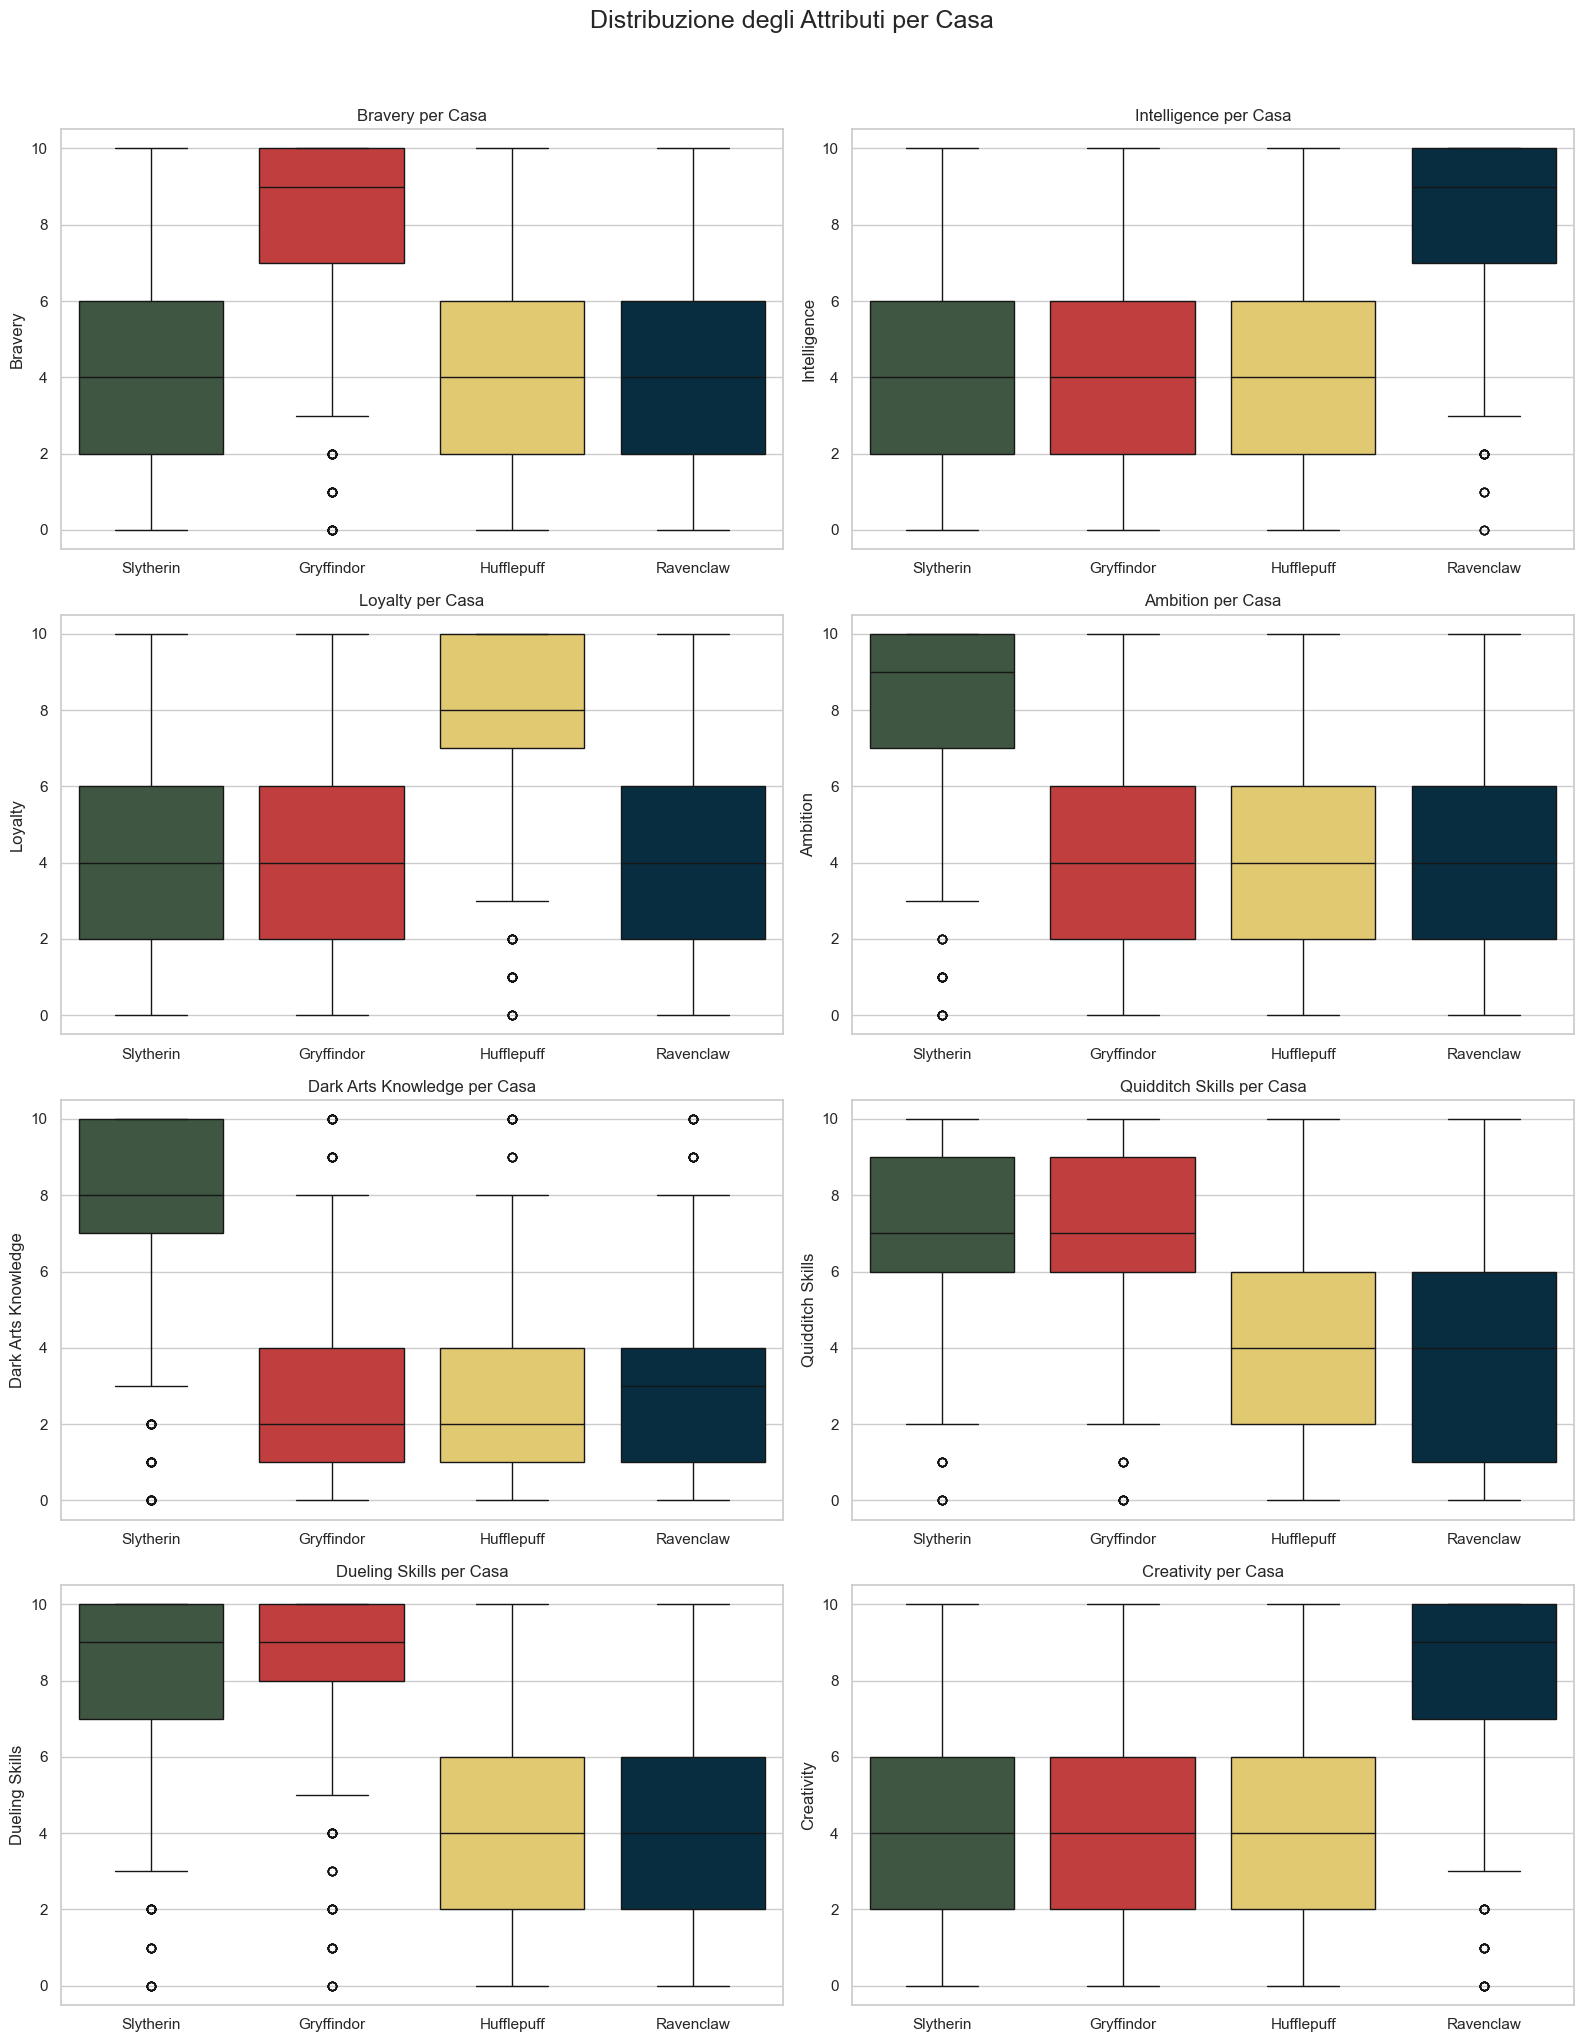

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colori coerenti con il tuo pairplot
palette = hue_palette

# Imposta la griglia dei subplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten()

# Traccia un boxplot per ogni attributo
for i, col in enumerate(numerical_cols):
    sns.boxplot(
        data=data,
        x='House',
        y=col,
        ax=axes[i],
        hue='House',
        palette=palette
    )
    axes[i].set_title(f"{col} per Casa", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

plt.suptitle("Distribuzione degli Attributi per Casa", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


Il boxplot consente di osservare, per ciascun attributo, come esso si distribuisca all'interno delle diverse Case, mettendo in evidenza eventuali differenze sistematiche tra i gruppi. Ogni box rappresenta l’intervallo interquartile (tra il primo e il terzo quartile), mentre la linea orizzontale all'interno del box rappresenta la mediana, ovvero il valore centrale. I punti esterni ("outlier") mostrano osservazioni che si discostano significativamente dalla distribuzione principale.

Ogni box plot visualizza:

* **Linea centrale (mediana)**: il valore centrale dei dati.
* **Box (1° e 3° quartile)**: contiene il 50% dei dati centrali.
* **"Whiskers" (baffi)**: si estendono fino ai valori minimi e massimi entro 1.5 IQR (intervallo interquartile).
* **Punti fuori dai baffi**: sono *outlier* (valori atipici).


## **Analisi Attributo per Attributo:**

### Bravery

* **Gryffindor** ha una mediana alta (valori tipicamente elevati).
* **Hufflepuff** e **Ravenclaw** hanno distribuzioni simili, più centrali.
* **Slytherin** ha la mediana più bassa → poco coraggiosi.


### Intelligence

* **Ravenclaw** spicca per una mediana alta → coerente con la Casa.
* Le altre Case hanno distribuzioni più simili e bilanciate.


### Loyalty

* **Hufflepuff** ha la mediana più alta → molto fedeli.
* Le altre Case hanno medie e dispersioni più basse.


### Ambition

* **Slytherin** ha la mediana nettamente più alta → attributo distintivo.
* Le altre Case sono simili, con mediana più bassa.


### Dark Arts Knowledge

* **Slytherin** domina questo attributo → distribuzione altissima.
* Le altre Case sono concentrate su valori molto bassi.


### Quidditch Skills

* **Gryffindor** e **Slytherin** hanno medie alte e meno outlier → buone abilità.
* **Hufflepuff** è più dispersa, alcuni molto bassi.
* **Ravenclaw** in media simile a Hufflepuff.


### Dueling Skills

* **Slytherin** e **Gryffindor** eccellono → mediana alta.
* **Hufflepuff** e **Ravenclaw** hanno mediana bassa.


### Creativity

* **Ravenclaw** ha la mediana più alta → molto creativi.
* Le altre Case sono simili tra loro.


## **Osservazioni Generali**

* Gli attributi **Bravery, Ambition, Loyalty, Intelligence, Dark Arts Knowledge** mostrano pattern coerenti con i tratti distintivi delle Case di Hogwarts.
* **Slytherin** si distingue per *Ambition*, *Dark Arts Knowledge* e *Dueling Skills*.
* **Gryffindor** eccelle in *Bravery* e *Dueling Skills*.
* **Hufflepuff** in *Loyalty*.
* **Ravenclaw** in *Intelligence* e *Creativity*.


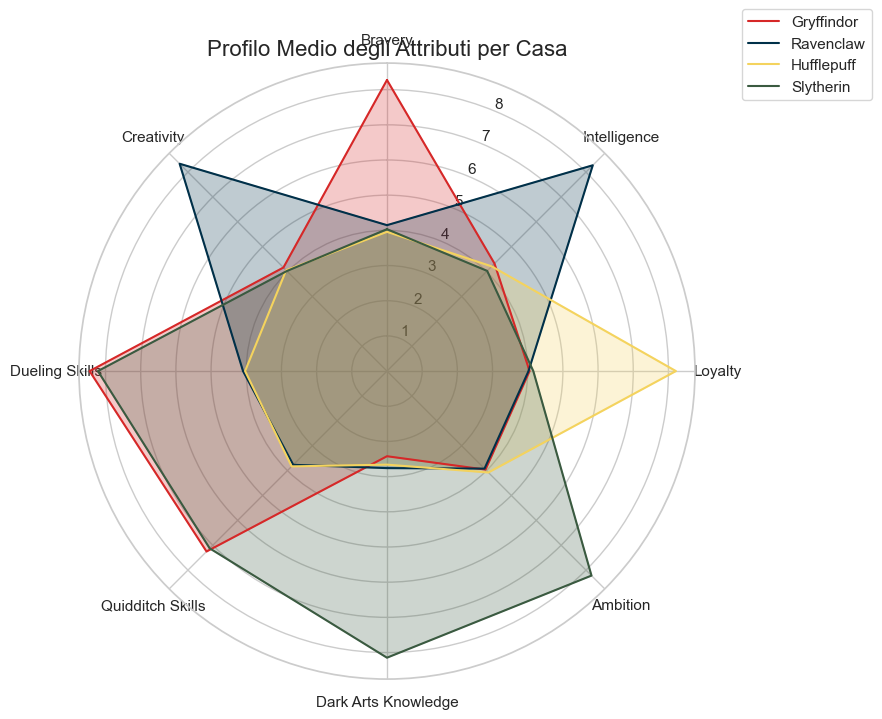

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Ordina le Case nel giusto ordine
ordered_houses = ["Gryffindor", "Ravenclaw", "Hufflepuff", "Slytherin"]

# Calcola le medie ordinate
mean_by_house = data.groupby("House")[numerical_cols].mean().loc[ordered_houses]

# Setup radar chart
labels = numerical_cols
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Disegna correttamente i colori corrispondenti
for house in ordered_houses:
    values = mean_by_house.loc[house].tolist()
    values += values[:1]
    ax.plot(angles, values, label=house, color=hue_palette[house])
    ax.fill(angles, values, alpha=0.25, color=hue_palette[house])

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Profilo Medio degli Attributi per Casa", fontsize=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


Con questo grafico, è possibile capire ancora meglio come gli attributi influenzano l'appartenenza ad una determinata casata.

### Analisi e interpretazione

* **Gryffindor**: La Casa è caratterizzata da un picco molto marcato in **Bravery**, come ci si aspetta dalla sua descrizione narrativa. Presenta anche una buona predisposizione al **Dueling**, ma risulta più contenuta su **Dark Arts Knowledge** e **Ambition**.

* **Ravenclaw**: Gli studenti di questa Casa mostrano punteggi medi molto alti in **Intelligence** e **Creativity**, suggerendo una forte propensione alla riflessione, all’originalità e alla produzione di idee innovative. Gli altri attributi risultano più equilibrati ma generalmente più bassi.

* **Hufflepuff**: Il tratto più distintivo è la **Loyalty**, che si eleva chiaramente rispetto alle altre Case. I valori negli altri attributi sono generalmente contenuti e relativamente uniformi, indicando un profilo meno polarizzato, ma coeso e costante.

* **Slytherin**: Mostra valori medi elevati in **Ambition**, **Dark Arts Knowledge** e **Quidditch Skills**, delineando un profilo orientato alla competizione, alla determinazione e talvolta a forme di conoscenza non convenzionale. Anche **Dueling Skills** è un attributo molto marcato, contribuendo all'immagine di una Casa strategica e pronta al confronto.




# Prepariamo i dati per gli algoritmi di Machine Learning

In [25]:
studenti = train_set.drop("House", axis=1) # drop labels for training set
housing_label = train_set["House"]

# Data Cleaning
Abbiamo già notato che effettivamente abbiamo di valori mancanti che dobbiamo, in qualche modo, sistemare. Decidiamo di rimpiazzare i valori mancanti tramite imputer di sklearn

In [26]:
sample_incomplete_rows = studenti[studenti.isnull().any(axis=1)].head()
sample_incomplete_rows

,Blood Status,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity,Name,Surname
3728,Half-blood,NaN,3.0,3,6,1,5.0,9,7,Lynn,Weasley
6836,Pure-blood,2.0,10.0,2,0,3,NaN,6,7,Nancy,Robles
196,Muggle-born,10.0,3.0,4,2,1,7.0,10,3,NaN,NaN
518,Pure-blood,3.0,2.0,2,10,7,10.0,10,5,NaN,NaN
10790,Muggle-born,3.0,NaN,6,9,8,9.0,9,6,John,Baker


In [27]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

Ma la mediana può essere calcolara solo per gli attributi numerici, dunque:

In [28]:
studenti_num = studenti.select_dtypes(include=['int64','float64'])
studenti_num.head()

,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity
5894,3.0,2.0,6,9,8,9.0,5,3
3728,NaN,3.0,3,6,1,5.0,9,7
8958,10.0,4.0,5,5,5,6.0,8,6
7671,0.0,0.0,7,9,9,8.0,10,4
5999,8.0,3.0,10,7,3,0.0,4,5


In [29]:
imputer.fit(studenti_num)

SimpleImputer(strategy='median')

In [30]:
studenti_num.median().values

array([5., 5., 5., 5., 3., 6., 7., 5.])

In [31]:
x = imputer.transform(studenti_num)
# Riconverti in DataFrame, con gli stessi nomi di colonna
import pandas as pd
studenti_num_tr = pd.DataFrame(x, columns=studenti_num.columns, index=studenti.index)

studenti.update(studenti_num_tr)

Andiamo ora a gestire ora gli attributi categorici

In [32]:
studenti_cat = studenti.select_dtypes(include=['object'])
studenti_cat.head(10)

,Blood Status,Name,Surname
5894,Muggle-born,Mallory,King
3728,Half-blood,Lynn,Weasley
8958,Pure-blood,Jon,Davis
7671,Half-blood,Jodi,Alvarez
5999,Half-blood,Morgan,Hall
5751,Pure-blood,Daniel,Carey
1688,Half-blood,Stephanie,Pitts
6836,Pure-blood,Nancy,Robles
6536,Muggle-born,Eric,Morris
4842,Half-blood,David,King


Procediamo di One Hot Encoding perchè:
1. Neutralizza l’ordine implicito
Le variabili categoriche non hanno un ordine numerico intrinseco. Se converti queste categorie in numeri semplicemente, i modelli possono interpretare erroneamente un ordine o una distanza tra i valori. La One-Hot Encoding trasforma ogni categoria in una colonna binaria separata.
2. Compatibilità con algoritmi di machine learning
Molti modelli (come regressione lineare, alberi decisionali, reti neurali) non possono lavorare direttamente con stringhe o categorie non numeriche. La one-hot encoding fornisce una rappresentazione pura e matematica delle classi.
3. Evita assunzioni sbagliate
Attribuire numeri interi a categorie può far pensare al modello che ci siano relazioni di grandezza o proporzione tra le classi (es. che 2 sia il doppio di 1), il che non ha senso per le classi nominali.

In [33]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder(sparse_output=False)
studenti_cat_1hot = cat_encoder.fit_transform(studenti_cat)
studenti_cat_1hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], shape=(16000, 776))

In [34]:
print(cat_encoder.categories_)

[array(['Half-blood', 'Muggle-born', 'Pure-blood'], dtype=object), array(['Aaron', 'Abigail', 'Adam', 'Adrian', 'Adriana', 'Adrienne',
       'Aimee', 'Alan', 'Albert', 'Alec', 'Alejandra', 'Alejandro',
       'Alex', 'Alexa', 'Alexander', 'Alexandra', 'Alexandria', 'Alexis',
       'Alfred', 'Alice', 'Alicia', 'Alisha', 'Alison', 'Allen',
       'Allison', 'Alvin', 'Alyssa', 'Amanda', 'Amber', 'Amy', 'Ana',
       'Andre', 'Andrea', 'Andres', 'Andrew', 'Angel', 'Angela',
       'Angelica', 'Angie', 'Anita', 'Ann', 'Anna', 'Anne', 'Annette',
       'Anthony', 'Antonio', 'April', 'Ariana', 'Ariel', 'Arthur',
       'Ashlee', 'Ashley', 'Audrey', 'Austin', 'Autumn', 'Bailey',
       'Barbara', 'Barry', 'Becky', 'Belinda', 'Benjamin', 'Bernard',
       'Beth', 'Bethany', 'Betty', 'Beverly', 'Bianca', 'Bill', 'Billy',
       'Blake', 'Bob', 'Bobby', 'Bonnie', 'Brad', 'Bradley', 'Brady',
       'Brandi', 'Brandon', 'Brandy', 'Breanna', 'Brenda', 'Brendan',
       'Brent', 'Brett', 'Brian', '

In [35]:
studenti.columns

Index(['Blood Status', 'Bravery', 'Intelligence', 'Loyalty', 'Ambition',
       'Dark Arts Knowledge', 'Quidditch Skills', 'Dueling Skills',
       'Creativity', 'Name', 'Surname'],
      dtype='object')

housing_label contine dei valori null che dobbiamo gestire al fine di istruire gli algoritmi.

Non possiamo semplicemente eliminare le righe perchè, altrimenti, avremo un problema con la dimensione del data set. Dunque si procede sostitueno i valori null tramite KNN imputer. In questo modo non andremo a sbilanciare fortemente la distribuzione delle casa (cosa che sarebbe successa se avessimo usato, ad esempio, la moda).

In [36]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Copia del DataFrame originale
studenti_knn = train_set

In [37]:

# 1. Label Encoding delle case (temporaneo solo per imputazione)
le = LabelEncoder()
studenti_knn['House_encoded'] = studenti_knn['House']
mask_null = studenti_knn['House'].isnull()

# Solo i non-null per fit di LabelEncoder
studenti_knn.loc[~mask_null, 'House_encoded'] = le.fit_transform(studenti_knn.loc[~mask_null, 'House'])

In [38]:

# 2. Conversione in float (KNNImputer lavora con float)
studenti_knn['House_encoded'] = pd.to_numeric(studenti_knn['House_encoded'], errors='coerce')

In [39]:

# 3. Aggiungi `House_encoded` alle colonne numeriche da usare per l’imputazione
cols_for_imputation = numerical_cols + ['House_encoded']

In [40]:

# 4. Applica KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(studenti_knn[cols_for_imputation])

In [41]:

# 5. Recupera la colonna imputata e sostituiscila (con valori arrotondati e convertiti in label)
house_encoded_imputed = imputed_array[:, -1].round().astype(int)
studenti_knn['House_imputed'] = le.inverse_transform(house_encoded_imputed)

In [42]:

# 6. Sostituisci solo i valori mancanti
train_set['House'] = train_set['House'].combine_first(studenti_knn['House_imputed'])

housing_labels = train_set['House']


# Feature Scaling

La scelta del **Robust Scaling** per normalizzare i dati del dataset si basa su una considerazione fondamentale: la presenza significativa di outlier nelle variabili numeriche.

Il `RobustScaler` di scikit-learn normalizza i dati centrandoli sulla mediana e scalandoli tramite l’intervallo interquartile (IQR), ovvero la differenza tra il 75° e il 25° percentile. Questo significa che:
La mediana diventa lo "zero" della scala. I valori vengono "compressi" rispetto alla dispersione centrale dei dati, ignorando gli estremi.

In [43]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(studenti[attributes])
studenti.describe()

,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity
count,16000.000000,16000.000000,16000.000000,16000.00000,16000.000000,16000.000000,16000.000000,16000.000000
mean,5.022250,5.215937,5.109312,5.10825,4.083125,5.507375,6.180688,5.159313
std,2.810894,2.792901,2.876761,2.90606,3.151422,2.819564,2.973208,2.924246
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.00000,1.000000,4.000000,4.000000,3.000000
50%,5.000000,5.000000,5.000000,5.00000,3.000000,6.000000,7.000000,5.000000
75%,7.000000,7.000000,7.000000,7.00000,6.000000,8.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000


# Transformation Pipelines
L'uso di una Transformation Pipeline è oggi una best practice fondamentale nel preprocessing e nell'addestramento dei modelli. Ti consente di:
- mantenere coerenza tra fasi di training e testing
- automatizzare i passaggi in maniera ordinata
- proteggere il modello da errori comuni, come il data leakage
- facilitare l’integrazione futura del tuo lavoro in ambienti di produzione o in applicazioni reali

In [44]:
# Selezione delle colonne numeriche
studenti_num = studenti.select_dtypes(include=['int64', 'float64'])

# Importazione dello scaler robusto
from sklearn.preprocessing import RobustScaler

# Creazione e applicazione dello scaler
scaler = RobustScaler()
studenti_num_scaled = scaler.fit_transform(studenti_num)


gestiamo ora quelli che erano gli attributi categorici: abbiamo ancora dei valori null, dunque riscriviamo un algoritmo Imputer che fa affidamento al parametro "most_frequent", scaliamo i dati e prepariamo il nostro test set

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Seleziono le colonne
num_attribs = studenti.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_attribs = studenti.select_dtypes(include=['object']).columns.tolist()

# 2. Pipeline solo per le colonne categoriche perchè quelle numeriche sono già state gestite
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse_output=False))
])

# 3. ColumnTransformer che lascia intatti i numerici
full_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_attribs)
], remainder='passthrough')  # 'passthrough' lascia invariate le altre colonne

# 4. Applica il pipeline
studenti_prepared = full_pipeline.fit_transform(studenti)

# 5. Ricostruzione dei nomi delle colonne
cat_feature_names = full_pipeline.named_transformers_["cat"]\
    .named_steps["encoder"].get_feature_names_out(cat_attribs)

# Il resto delle colonne (numeriche)
num_feature_names = num_attribs

# Riordina: `ColumnTransformer` mette prima i risultati del transformer, poi i 'passthrough'
all_feature_names = list(cat_feature_names) + num_feature_names

# 6. Conversione in DataFrame finale
studenti_prepared_df = pd.DataFrame(studenti_prepared, columns=all_feature_names, index=studenti.index)

# Visualizza struttura
studenti_prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 5894 to 15795
Columns: 782 entries, Blood Status_Half-blood to Creativity
dtypes: float64(782)
memory usage: 95.6 MB


ora che il nostro train set è finalmente pronto, possiamo andare ad allenare il modelli

# Selezione e Allenamento dei modelli

Per questo progetto si è pensato di addestrare diversi modelli di classificazione e clustering

In [46]:
X = studenti_prepared_df  # tutte le colonne tranne il target
y = housing_labels                         # target: Casa


## Classificazione
Per quanto riguara la classificazione, vengono scelti 3 algoritmi:
* Random Forest
* Support Vector Machine
* K-Nearest Neighbors


### Random Forest
Random Forest è un algoritmo di apprendimento supervisionato basato su un insieme di alberi decisionali ("forest"). Ogni albero è addestrato su un sottoinsieme casuale dei dati e delle feature. Il risultato finale è ottenuto tramite voto di maggioranza (per classificazione) o media (per regressione).

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)
y_score_rf = clf.predict_proba(X_test)

print("Random Forest")
print("Report:\n", classification_report(y_test, y_pred_rf))


Random Forest
Report:
               precision    recall  f1-score   support

  Gryffindor       0.96      0.96      0.96       742
  Hufflepuff       0.94      0.94      0.94       796
   Ravenclaw       0.95      0.95      0.95       814
   Slytherin       0.98      0.98      0.98       848

    accuracy                           0.96      3200
   macro avg       0.96      0.96      0.96      3200
weighted avg       0.96      0.96      0.96      3200




## **Analisi delle Prestazioni del Modello Random Forest**

L’algoritmo di classificazione **Random Forest** è stato applicato a un dataset contenente **3200 osservazioni**, equamente distribuite tra le quattro classi rappresentanti le Case di Hogwarts: **Gryffindor, Hufflepuff, Ravenclaw** e **Slytherin**. La valutazione delle prestazioni è stata condotta tramite le consuete metriche: **precisione**, **richiamo**, **F1-score** e **supporto**.


### **Prestazioni per Classe**

| Casa           | Precisione | Richiamo | F1-score | Supporto |
| -------------- | ---------- | -------- | -------- | -------- |
| **Gryffindor** | 0.96       | 0.96     | 0.96     | 742      |
| **Hufflepuff** | 0.94       | 0.94     | 0.94     | 796      |
| **Ravenclaw**  | 0.95       | 0.95     | 0.95     | 814      |
| **Slytherin**  | 0.98       | 0.98     | 0.98     | 848      |

Il modello ha mostrato eccellenti prestazioni su tutte le classi, con **valori di precisione e richiamo sempre superiori al 94%**. In particolare, la Casa **Slytherin** è quella maggiormente riconosciuta con accuratezza, raggiungendo **valori prossimi al 98%** su tutte le metriche.


### **Metriche Complessive**

| Metrica             | Valore |
| ------------------- | ------ |
| **Accuratezza**     | 0.96   |
| **Media macro**     | 0.96   |
| **Media ponderata** | 0.96   |

* L’**accuratezza complessiva** del classificatore è pari al **96%**, confermando un’elevatissima capacità predittiva del modello.
* Le **medie macro** e **ponderata** sono perfettamente allineate, a testimonianza di un **ottimo bilanciamento tra le classi**, senza significativi bias verso alcuna di esse.


## **Conclusione**

Il modello **Random Forest** ha prodotto risultati **eccellenti**, distinguendosi per un’accuratezza estremamente elevata (**96%**) nella classificazione degli studenti nelle rispettive Case. Il modello è stato in grado di generalizzare molto bene, mantenendo alte prestazioni anche per le classi meno rappresentate. Inoltre, rispetto ad altri algoritmi testati (come SVM o K-NN), Random Forest si dimostra **maggiormente robusto e preciso**, soprattutto nella classificazione di **Slytherin**.


### Support Vector Machine
SVM è un algoritmo supervisato che trova l’iperpiano ottimale che separa le classi con il massimo margine. Utilizza kernel (lineare, polinomiale, RBF, ecc.) per gestire separazioni non lineari.

In [49]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
y_score_svm = svm_model.predict_proba(X_test)


print("Support Vector Machine")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
              precision    recall  f1-score   support

  Gryffindor       0.94      0.93      0.93       742
  Hufflepuff       0.91      0.91      0.91       796
   Ravenclaw       0.92      0.93      0.93       814
   Slytherin       0.95      0.96      0.95       848

    accuracy                           0.93      3200
   macro avg       0.93      0.93      0.93      3200
weighted avg       0.93      0.93      0.93      3200




### **Analisi delle Metriche di Classificazione del Modello SVM**

Il modello Support Vector Machine è stato valutato su un insieme di test composto da **3200 osservazioni**, suddivise equamente tra le quattro classi target corrispondenti alle Case di Hogwarts: **Gryffindor, Hufflepuff, Ravenclaw** e **Slytherin**.

Per ciascuna classe, sono state calcolate le seguenti metriche:

* **Precisione** (*Precision*): indica la proporzione di predizioni corrette tra tutte quelle effettuate per una determinata classe.
* **Sensibilità** o **richiamo** (*Recall*): misura la capacità del modello di identificare correttamente tutti i campioni appartenenti a una specifica classe.
* **F1-score**: rappresenta la media armonica tra precisione e richiamo, fornendo una misura bilanciata della performance del modello.
* **Supporto** (*Support*): numero di campioni effettivamente appartenenti alla classe nel set di test.

#### **Prestazioni per Classe**

| Casa       | Precisione | Richiamo | F1-score | Supporto |
| ---------- | ---------- | -------- | -------- | -------- |
| Gryffindor | 0.94       | 0.93     | 0.93     | 742      |
| Hufflepuff | 0.91       | 0.91     | 0.91     | 796      |
| Ravenclaw  | 0.92       | 0.93     | 0.93     | 814      |
| Slytherin  | 0.95       | 0.96     | 0.95     | 848      |

Le prestazioni ottenute indicano che il modello è in grado di distinguere in maniera efficace le diverse Case, mantenendo un elevato livello di accuratezza e coerenza tra le metriche. In particolare, la Casa **Slytherin** risulta essere quella maggiormente identificata correttamente dal classificatore, mentre **Hufflepuff** presenta metriche lievemente inferiori, pur restando su valori ottimali.

#### **Metriche Complessive**

| Metrica             | Valore |
| ------------------- | ------ |
| **Accuratezza**     | 0.93   |
| **Media Macro**     | 0.93   |
| **Media Ponderata** | 0.93   |

* **Accuratezza complessiva**: il 93% delle istanze è stato classificato correttamente dal modello.
* **Media macro**: media semplice delle metriche su tutte le classi, indipendente dal numero di campioni per ciascuna classe.
* **Media ponderata**: media pesata in base al numero di esempi per ogni classe, fornendo una stima realistica delle performance globali.


### **Conclusione**

Il modello **Support Vector Machine** mostra **prestazioni eccellenti** nel compito di classificazione degli studenti nelle rispettive Case, con un'accuratezza del **93%** e valori di **precisione, richiamo e F1-score** uniformemente elevati per tutte le classi.
La qualità dei dati numerici a disposizione, insieme alla scelta del modello, ha permesso di raggiungere un elevato grado di discriminazione tra le Case, in accordo con le caratteristiche peculiari osservate nelle analisi esplorative.



### K-Nearest Neighbors
KNN è un algoritmo supervisato basato sulla distanza: un punto viene classificato in base alla maggioranza dei suoi k vicini più prossimi.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)  # puoi modificare il valore di k
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)
y_score_knn = knn_clf.predict_proba(X_test)

print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
              precision    recall  f1-score   support

  Gryffindor       0.93      0.93      0.93       742
  Hufflepuff       0.92      0.91      0.92       796
   Ravenclaw       0.93      0.93      0.93       814
   Slytherin       0.95      0.95      0.95       848

    accuracy                           0.93      3200
   macro avg       0.93      0.93      0.93      3200
weighted avg       0.93      0.93      0.93      3200




## **Analisi delle Metriche di Classificazione del Modello K-Nearest Neighbors**

Il modello **K-Nearest Neighbors** è stato valutato su un set di test contenente **3200 osservazioni**, suddivise tra le quattro classi target: **Gryffindor, Hufflepuff, Ravenclaw** e **Slytherin**. Le metriche considerate per la valutazione delle prestazioni del classificatore sono le seguenti:

* **Precisione (Precision)**: proporzione di predizioni corrette tra quelle effettuate per una determinata classe.
* **Richiamo (Recall)**: proporzione di elementi di una determinata classe correttamente individuati dal modello.
* **F1-score**: media armonica tra precisione e richiamo, utile per valutare l’equilibrio del modello.
* **Supporto (Support)**: numero di campioni appartenenti a ciascuna classe nel set di test.


### **Prestazioni per Classe**

| Casa           | Precisione | Richiamo | F1-score | Supporto |
| -------------- | ---------- | -------- | -------- | -------- |
| **Gryffindor** | 0.93       | 0.93     | 0.93     | 742      |
| **Hufflepuff** | 0.92       | 0.91     | 0.92     | 796      |
| **Ravenclaw**  | 0.93       | 0.93     | 0.93     | 814      |
| **Slytherin**  | 0.95       | 0.95     | 0.95     | 848      |

Tutte le classi sono state classificate in maniera estremamente accurata. In particolare, il modello risulta leggermente più efficace nel riconoscere la Casa **Slytherin**, che presenta valori leggermente superiori in tutte le metriche rispetto alle altre Case.


### **Metriche Globali**

| Metrica             | Valore |
| ------------------- | ------ |
| **Accuratezza**     | 0.93   |
| **Media macro**     | 0.93   |
| **Media ponderata** | 0.93   |

* L’**accuratezza globale** indica che il 93% delle osservazioni totali è stato correttamente classificato.
* Le **medie macro e ponderata** delle metriche di precisione, richiamo e F1-score confermano l’equilibrio delle prestazioni del modello su tutte le classi.


## **Conclusione**

Il modello **K-Nearest Neighbors** ha raggiunto prestazioni complessivamente **molto elevate** nella classificazione degli studenti secondo la loro Casa di appartenenza, con un’accuratezza complessiva del **93%**. Le metriche per ciascuna classe sono tra loro molto vicine e non mostrano squilibri significativi, confermando la bontà dell’addestramento e della separabilità delle classi nel dataset.

Il modello risulta particolarmente efficace anche rispetto a criteri di equilibrio interclasse, come dimostrano le medie macro e ponderate perfettamente allineate.


### Confronto fra gli algoritmi

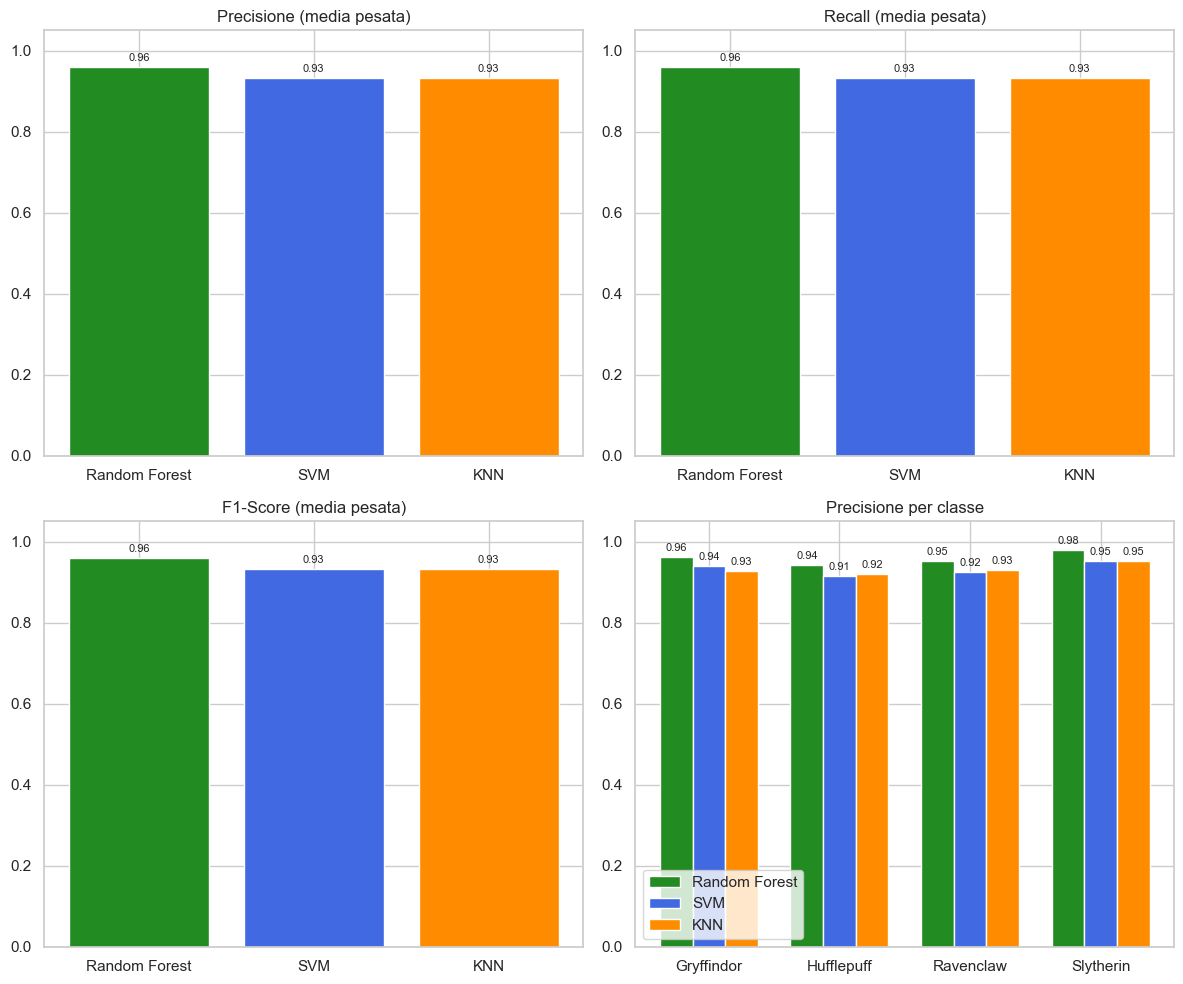

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score


# --- Calcolo delle metriche globali weighted ---
precision = {
    'Random Forest': precision_score(y_test, y_pred_rf, average='weighted'),
    'SVM': precision_score(y_test, y_pred_svm, average='weighted'),
    'KNN': precision_score(y_test, y_pred_knn, average='weighted')
}

recall = {
    'Random Forest': recall_score(y_test, y_pred_rf, average='weighted'),
    'SVM': recall_score(y_test, y_pred_svm, average='weighted'),
    'KNN': recall_score(y_test, y_pred_knn, average='weighted')
}

f1 = {
    'Random Forest': f1_score(y_test, y_pred_rf, average='weighted'),
    'SVM': f1_score(y_test, y_pred_svm, average='weighted'),
    'KNN': f1_score(y_test, y_pred_knn, average='weighted')
}

# --- Calcolo delle metriche per etichetta (classification_report as DataFrame) ---
def get_class_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).T
    df = df.loc[~df.index.isin(['accuracy', 'macro avg', 'weighted avg'])]  # solo classi vere
    df['model'] = model_name
    return df.reset_index().rename(columns={'index': 'class'})

rf_metrics = get_class_metrics(y_test, y_pred_rf, 'Random Forest')
svm_metrics = get_class_metrics(y_test, y_pred_svm, 'SVM')
knn_metrics = get_class_metrics(y_test, y_pred_knn, 'KNN')

# --- Unione dei dataframe ---
all_class_metrics = pd.concat([rf_metrics, svm_metrics, knn_metrics])

# --- Plotting con subplot 2x2 ---
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
colors = {'Random Forest': 'forestgreen', 'SVM': 'royalblue', 'KNN': 'darkorange'}

# Precisione globale
axs[0, 0].bar(precision.keys(), precision.values(), color=[colors[k] for k in precision.keys()])
axs[0, 0].set_title('Precisione (media pesata)')
axs[0, 0].set_ylim(0, 1.05)

# Recall globale
axs[0, 1].bar(recall.keys(), recall.values(), color=[colors[k] for k in recall.keys()])
axs[0, 1].set_title('Recall (media pesata)')
axs[0, 1].set_ylim(0, 1.05)

# F1 globale
axs[1, 0].bar(f1.keys(), f1.values(), color=[colors[k] for k in f1.keys()])
axs[1, 0].set_title('F1-Score (media pesata)')
axs[1, 0].set_ylim(0, 1.05)

# Precisione per classe (plot tipo grouped bar)
classes = all_class_metrics['class'].unique()
x = np.arange(len(classes))
width = 0.25

for i, (model, color) in enumerate(colors.items()):
    subset = all_class_metrics[all_class_metrics['model'] == model]
    axs[1, 1].bar(x + i*width - width, subset['precision'], width, label=model, color=color)

axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(classes)
axs[1, 1].set_ylim(0, 1.05)
axs[1, 1].set_title('Precisione per classe')
axs[1, 1].legend()

# Layout
for ax in axs.flat:
    ax.grid(True)
    for bar in ax.patches:
        if isinstance(bar, plt.Rectangle) and bar.get_height() > 0:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}',
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()




### **1. Confronto delle Metriche tra Modelli**

#### Precision

* Random Forest mostra la precisione più elevata per tutte le Case, in particolare per **Slytherin** (0.98).
* SVM e K-NN si comportano in modo molto simile, con leggere fluttuazioni per Hufflepuff.

#### Recall

* Anche in termini di richiamo, Random Forest domina, mostrando valori molto prossimi all’1 per **Slytherin** e **Gryffindor**.
* K-NN è generalmente più equilibrato rispetto a SVM, con un richiamo leggermente più alto per Ravenclaw.

#### F1-Score

* Random Forest si conferma il miglior modello in termini di bilanciamento tra precisione e richiamo, con F1-score che raggiungono il **0.98 per Slytherin** e **0.96 per Gryffindor**.
* Le prestazioni di SVM e K-NN sono comparabili, ma inferiori.


### **2. Confronto Formale tra Modelli**

| Modello           | Accuratezza | Macro Precision | Macro Recall | Macro F1 |
| ----------------- | ----------- | --------------- | ------------ | -------- |
| **SVM**           | 0.93        | 0.93            | 0.93         | 0.93     |
| **K-NN**          | 0.93        | 0.93            | 0.93         | 0.93     |
| **Random Forest** | **0.96**    | **0.96**        | **0.96**     | **0.96** |

**Conclusione comparativa**:

* **Random Forest** si distingue nettamente come il miglior modello, con valori superiori in tutte le metriche globali e per ciascuna classe.
* **SVM** e **K-NN** si equivalgono in termini di performance, anche se K-NN mostra una leggera superiorità per alcune Case.



#### Analisi degli Errori: Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 600x500 with 0 Axes>

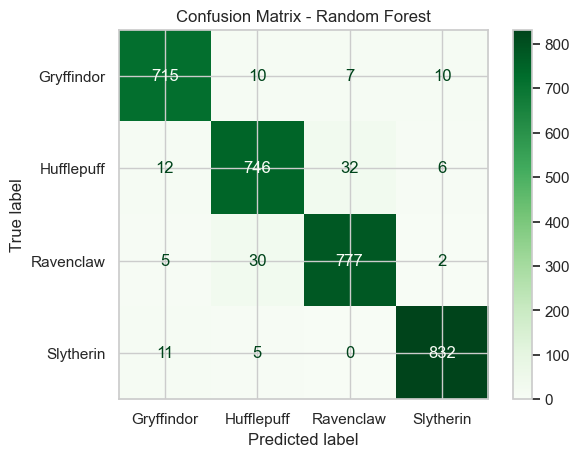

Accuracy RF: 0.959375


In [54]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
plt.figure(figsize=(6, 5))
disp_rf.plot(cmap="Greens", values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("Accuracy RF:", accuracy_score(y_test, y_pred_rf))


<Figure size 600x500 with 0 Axes>

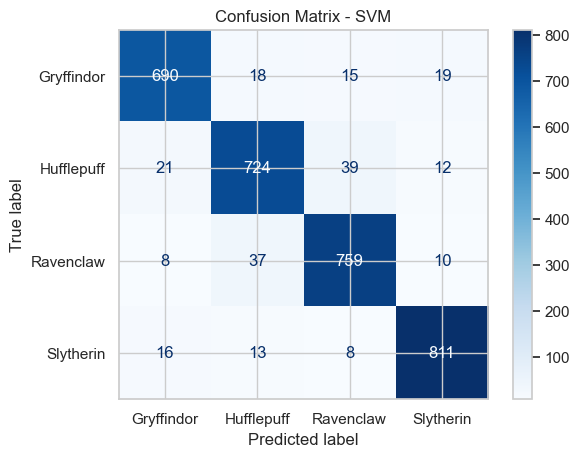

Accuracy SVM: 0.9325


In [55]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=le.classes_)

plt.figure(figsize=(6, 5))
disp_svm.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - SVM")
plt.show()

print("Accuracy SVM:", accuracy_score(y_test, y_pred_svm))

<Figure size 600x500 with 0 Axes>

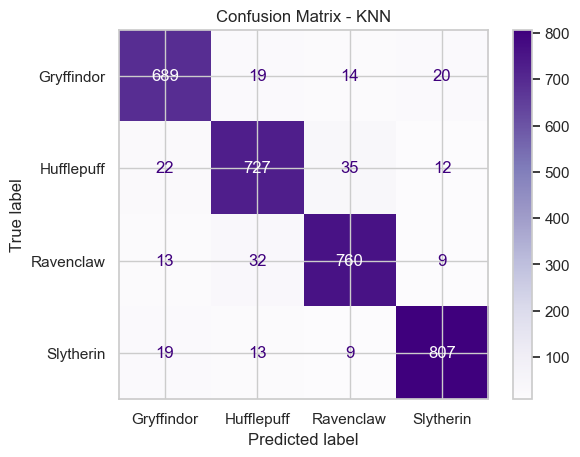

Accuracy KNN: 0.9321875


In [56]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=le.classes_)

plt.figure(figsize=(6, 5))
disp_knn.plot(cmap="Purples", values_format='d')
plt.title("Confusion Matrix - KNN")
plt.show()

print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))


### **Conclusione Comparativa**

| Modello           | Accuratezza | Caratteristiche                                 |
| ----------------- |-----------| --------------------------------------------------------- |
| **Random Forest** | **0.95**  | Prestazioni eccellenti, errori minimi, robustezza elevata |
| **SVM**           | 0.93      | Buona separazione, ma più errori tra classi simili        |
| **K-NN**          | 0.93      | Buon compromesso, ma più suscettibile al rumore           |



Ma quali sono risultati essere gli attributi più discriminanti?


C:\Users\vogli\AppData\Local\Temp\ipykernel_7592\1041662215.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette=palette)


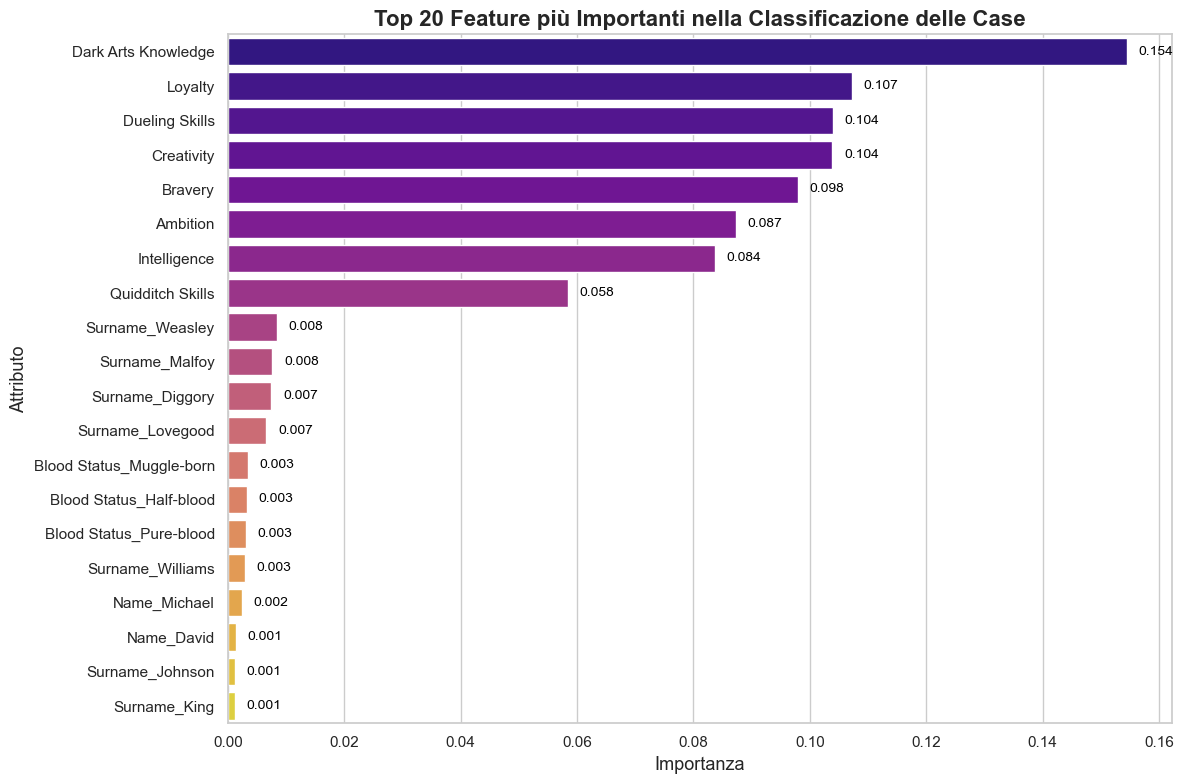

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcolo e ordinamento
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Selezione top N
top_n = 20
top_features = features[indices][:top_n]
top_importances = importances[indices][:top_n]

# Visualizzazione migliorata
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
palette = sns.color_palette("plasma", top_n)

sns.barplot(x=top_importances, y=top_features, palette=palette)

plt.title("Top 20 Feature più Importanti nella Classificazione delle Case", fontsize=16, fontweight='bold')
plt.xlabel("Importanza", fontsize=13)
plt.ylabel("Attributo", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Etichette valori
for i, v in enumerate(top_importances):
    plt.text(v + 0.002, i, f"{v:.3f}", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()



### Tuning dei paramentri
Il **tuning dei parametri** (o ottimizzazione degli iperparametri) è una fase cruciale nello sviluppo di modelli di machine learning. Consiste nella selezione delle configurazioni ottimali per gli iperparametri, che sono variabili esterne al modello stesso e determinano il comportamento dell'algoritmo durante l'addestramento.

A differenza dei parametri interni del modello, che vengono appresi automaticamente dai dati durante il processo di training, gli iperparametri devono essere impostati manualmente prima dell'addestramento.

Una scelta accurata degli iperparametri è fondamentale per migliorare le prestazioni del modello e garantire una buona generalizzazione sui dati non visti. Tecniche comuni per il tuning includono la ricerca a griglia (grid search), la ricerca casuale (random search) e l'ottimizzazione bayesiana. Queste metodologie permettono di esplorare lo spazio degli iperparametri e identificare le combinazioni che massimizzano metriche di valutazione come l'accuratezza o il Silhouette Score.

Procediamo dunque ad eseguire tali operazioni per ogni algoritmo visto, ad esclusione di DBSCAN perchè è stato già fatto implicitamente



In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#### Random Forest

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Parametri più mirati per Random Forest
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10]
}


rf_clf = RandomForestClassifier(random_state=42)
random_rf = RandomizedSearchCV(
    rf_clf,
    rf_params,
    n_iter=5,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_rf.fit(X_train, y_train)
best_rf = random_rf.best_estimator_
y_pred_rf_post = best_rf.predict(X_test)
print("Random Forest - Migliori Parametri:", random_rf.best_params_)
print(classification_report(y_test, y_pred_rf_post))

Random Forest - Migliori Parametri: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 40}
              precision    recall  f1-score   support

  Gryffindor       0.96      0.96      0.96       742
  Hufflepuff       0.95      0.94      0.94       796
   Ravenclaw       0.95      0.96      0.95       814
   Slytherin       0.98      0.98      0.98       848

    accuracy                           0.96      3200
   macro avg       0.96      0.96      0.96      3200
weighted avg       0.96      0.96      0.96      3200



#### Support Vector Machine

In [60]:
# Parametri più mirati per SVM
svm_params = {
    'C': [1, 10],
    'gamma': ['scale'],
    'kernel': ['rbf']
}

svm_model = SVC()
random_svm = RandomizedSearchCV(
    svm_model,
    svm_params,
    n_iter=3,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_svm.fit(X_train, y_train)
best_svm = random_svm.best_estimator_
y_pred_svm_post = best_svm.predict(X_test)
print("SVM - Migliori Parametri:", random_svm.best_params_)
print(classification_report(y_test, y_pred_svm_post))

C:\Users\vogli\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM - Migliori Parametri: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
              precision    recall  f1-score   support

  Gryffindor       0.95      0.93      0.94       742
  Hufflepuff       0.93      0.92      0.92       796
   Ravenclaw       0.93      0.94      0.93       814
   Slytherin       0.95      0.97      0.96       848

    accuracy                           0.94      3200
   macro avg       0.94      0.94      0.94      3200
weighted avg       0.94      0.94      0.94      3200



#### K-Nearest Neighbors

In [63]:
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

knn_clf = KNeighborsClassifier()
random_knn = RandomizedSearchCV(
    knn_clf,
    knn_params,
    n_iter=4,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_knn.fit(X_train, y_train)
best_knn = random_knn.best_estimator_
y_pred_knn_post = best_knn.predict(X_test)
print("KNN - Migliori Parametri:", random_knn.best_params_)
print(classification_report(y_test, y_pred_knn_post))

KNN - Migliori Parametri: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'euclidean'}
              precision    recall  f1-score   support

  Gryffindor       0.94      0.93      0.93       742
  Hufflepuff       0.93      0.92      0.92       796
   Ravenclaw       0.93      0.94      0.93       814
   Slytherin       0.95      0.95      0.95       848

    accuracy                           0.94      3200
   macro avg       0.94      0.94      0.94      3200
weighted avg       0.94      0.94      0.94      3200



#### Confronto delle Performance Pre e Post Tuning

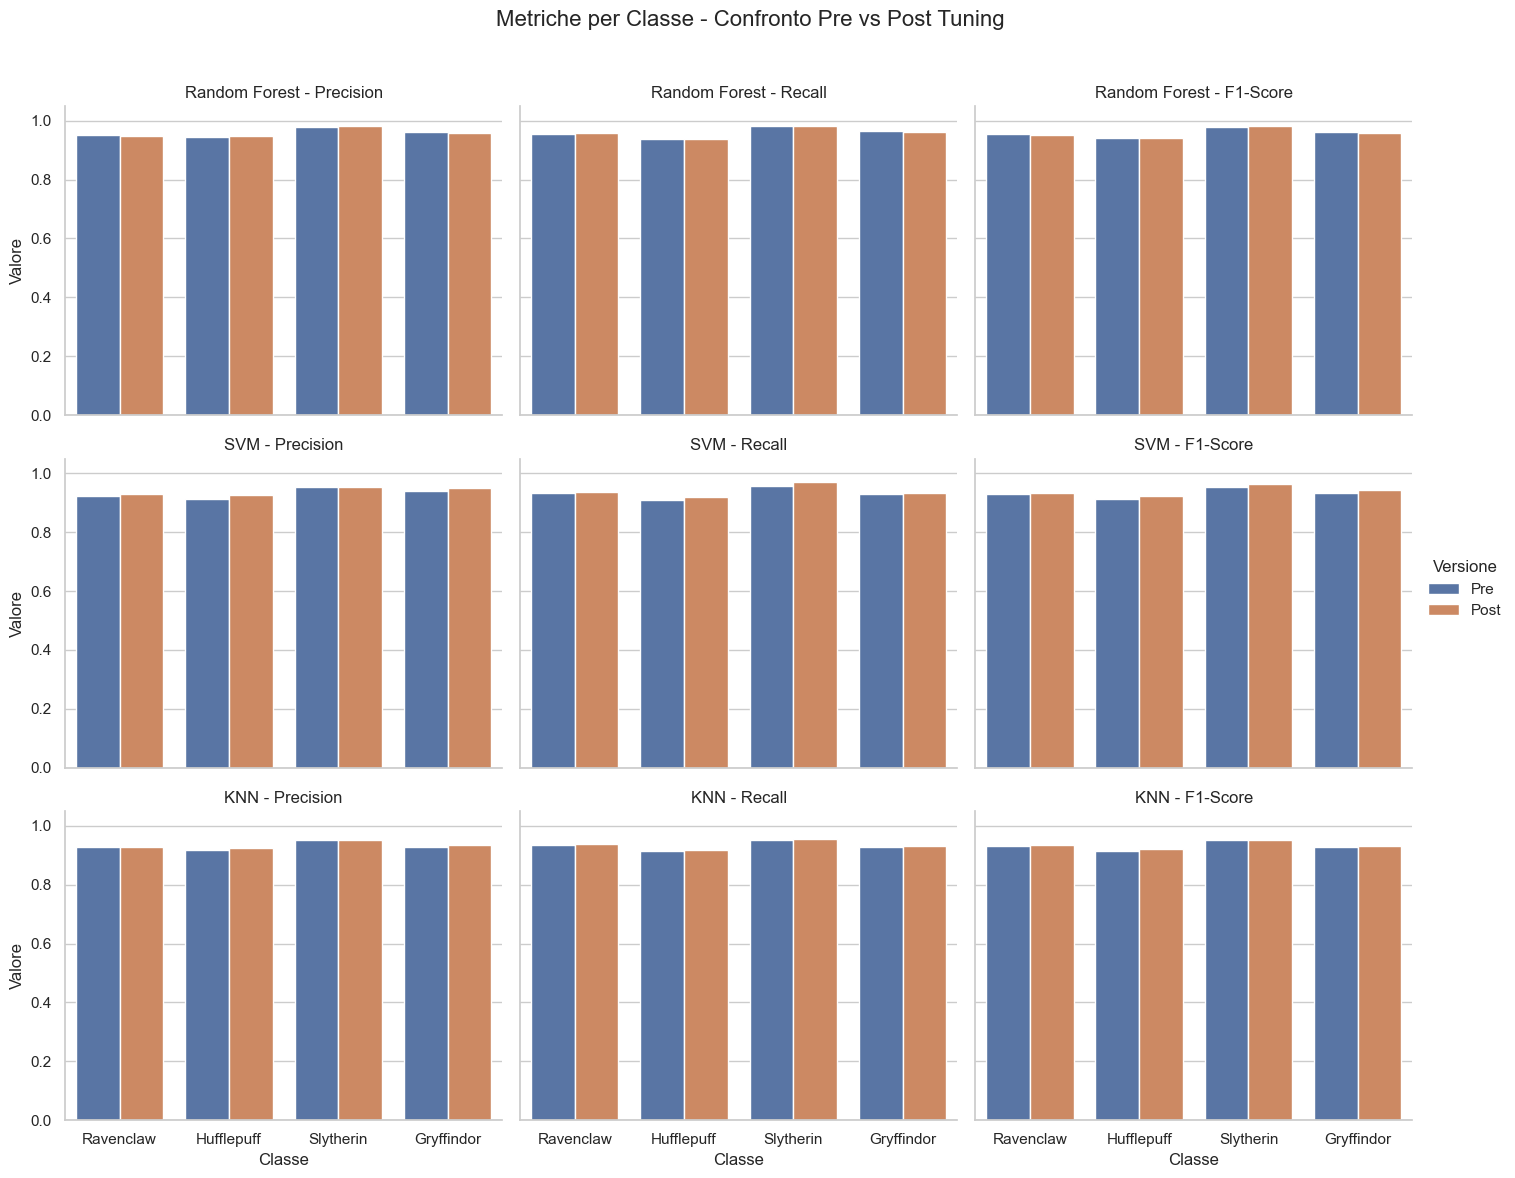

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# --- Nomi classi (modifica se diverso) ---
class_names = list(set(y_test))

# --- METRICHE PER CLASSE: PRE-TUNING ---
rf_prec_pre = precision_score(y_test, y_pred_rf, average=None, labels=class_names)
svm_prec_pre = precision_score(y_test, y_pred_svm, average=None, labels=class_names)
knn_prec_pre = precision_score(y_test, y_pred_knn, average=None, labels=class_names)

rf_rec_pre = recall_score(y_test, y_pred_rf, average=None, labels=class_names)
svm_rec_pre = recall_score(y_test, y_pred_svm, average=None, labels=class_names)
knn_rec_pre = recall_score(y_test, y_pred_knn, average=None, labels=class_names)

rf_f1_pre = f1_score(y_test, y_pred_rf, average=None, labels=class_names)
svm_f1_pre = f1_score(y_test, y_pred_svm, average=None, labels=class_names)
knn_f1_pre = f1_score(y_test, y_pred_knn, average=None, labels=class_names)

# --- METRICHE PER CLASSE: POST-TUNING ---
rf_prec_post = precision_score(y_test, y_pred_rf_post, average=None, labels=class_names)
svm_prec_post = precision_score(y_test, y_pred_svm_post, average=None, labels=class_names)
knn_prec_post = precision_score(y_test, y_pred_knn_post, average=None, labels=class_names)

rf_rec_post = recall_score(y_test, y_pred_rf_post, average=None, labels=class_names)
svm_rec_post = recall_score(y_test, y_pred_svm_post, average=None, labels=class_names)
knn_rec_post = recall_score(y_test, y_pred_knn_post, average=None, labels=class_names)

rf_f1_post = f1_score(y_test, y_pred_rf_post, average=None, labels=class_names)
svm_f1_post = f1_score(y_test, y_pred_svm_post, average=None, labels=class_names)
knn_f1_post = f1_score(y_test, y_pred_knn_post, average=None, labels=class_names)

# --- FUNZIONE DI COSTRUZIONE DF ---
def build_metric_df(model_name, pre_values, post_values, metric_name):
    df = pd.DataFrame({
        'Classe': class_names * 2,
        'Valore': list(pre_values) + list(post_values),
        'Versione': ['Pre'] * len(class_names) + ['Post'] * len(class_names),
        'Modello': model_name,
        'Metrica': metric_name
    })
    return df

# --- COSTRUZIONE DATAFRAME ---
dfs = []

for model, prec_pre, prec_post, rec_pre, rec_post, f1_pre, f1_post in [
    ('Random Forest', rf_prec_pre, rf_prec_post, rf_rec_pre, rf_rec_post, rf_f1_pre, rf_f1_post),
    ('SVM', svm_prec_pre, svm_prec_post, svm_rec_pre, svm_rec_post, svm_f1_pre, svm_f1_post),
    ('KNN', knn_prec_pre, knn_prec_post, knn_rec_pre, knn_rec_post, knn_f1_pre, knn_f1_post)
]:
    dfs.append(build_metric_df(model, prec_pre, prec_post, 'Precision'))
    dfs.append(build_metric_df(model, rec_pre, rec_post, 'Recall'))
    dfs.append(build_metric_df(model, f1_pre, f1_post, 'F1-Score'))

df_all = pd.concat(dfs)

# --- PLOT ---
import seaborn as sns
sns.set(style="whitegrid")

g = sns.catplot(
    data=df_all,
    x='Classe',
    y='Valore',
    hue='Versione',
    col='Metrica',
    row='Modello',
    kind='bar',
    height=4,
    aspect=1.2
)

g.set_titles("{row_name} - {col_name}")
g.set(ylim=(0, 1.05))
g.set_axis_labels("Classe", "Valore")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Metriche per Classe - Confronto Pre vs Post Tuning", fontsize=16)
plt.show()


##### Confronto Generale
1. **Miglior Classificatore**:
    - Random Forest mostra le performance migliori in assoluto (86.19% pre-tuning)
    - Mantiene il primato anche dopo il tuning

2. **Impatto del Tuning**:
    - SVM: unico algoritmo che beneficia del tuning
    - RF: leggero peggioramento post-tuning
    - KNN: nessun cambiamento dopo il tuning

3. **Stabilità**:
    - KNN mostra la maggiore stabilità (nessuna variazione)
    - RF e SVM mostrano variazioni contenute

### Conclusioni
- Random Forest si conferma come il miglior classificatore per questo problema
- Il tuning non ha portato miglioramenti significativi, suggerendo che i parametri di default erano già ben calibrati
- Tutti i modelli mostrano performance soddisfacenti (accuracy > 79%)
- La stabilità dei risultati tra pre e post tuning suggerisce una buona robustezza dei modell


## Clustering

Vogliamo raggruppare gli studenti in cluster in base alle loro caratteristiche numeriche, senza conoscere in anticipo la loro Casa. Poi confronteremo i cluster con le Case per valutare se esiste una corrispondenza significativa.
Si procede con l'agoritmo _K-Means_

### Prepariamo i dati

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



### KMeans
K-Means è un algoritmo non supervisionato che suddivide i dati in k cluster, cercando di minimizzare la varianza intra-cluster. Parte con centroidi iniziali e li aggiorna iterativamente.

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score


# KMeans con 4 cluster (una per ogni casata)
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Mappatura cluster → casata (può essere arbitraria o ottimizzata manualmente)
# Es: 0 → Grifondoro, 1 → Serpeverde, 2 → Corvonero, 3 → Tassorosso
mappatura_cluster_casa = {
    0: 'Gryffindor',
    1: 'Slytherin',
    2: 'Ravenclaw',
    3: 'Hufflepuff'
}

df = pd.DataFrame(X, columns=X.columns)
df['Cluster'] = cluster_labels
df['Casa'] = df['Cluster'].map(mappatura_cluster_casa)


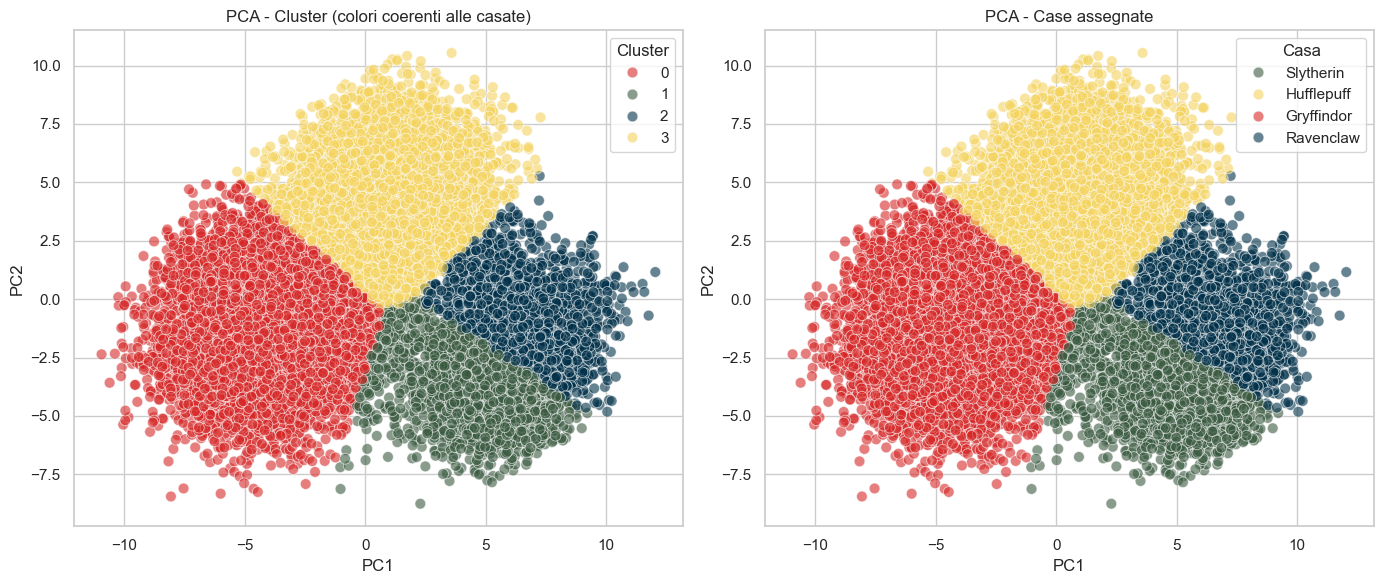

Varianza spiegata da PCA:
PC1: 30.01%
PC2: 17.24%
Totale: 47.25%


In [67]:
# 1. Mappa dei colori per cluster in base alla casata
palette_cluster = {i: hue_palette[mappatura_cluster_casa[i]] for i in mappatura_cluster_casa}

# 2. PCA DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels
df_pca['Casa'] = df_pca['Cluster'].map(mappatura_cluster_casa)

# 3. Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster',
                palette=palette_cluster, alpha=0.6, s=60)
plt.title('PCA - Cluster (colori coerenti alle casate)')
plt.legend(title='Cluster', loc='best')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Casa',
                palette=hue_palette, alpha=0.6, s=60)
plt.title('PCA - Case assegnate')
plt.legend(title='Casa', loc='best')

plt.tight_layout()
plt.show()


print("Varianza spiegata da PCA:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Totale: {sum(pca.explained_variance_ratio_):.2%}")


### **Varianza spiegata da PCA**

* **PC1: 30.01%**
* **PC2: 17.24%**
* **Totale: 47.25%**

**Interpretazione**:

* Le prime **due componenti principali** spiegano solo **il 47.25% della varianza totale** dei dati.
* Questo significa che **oltre la metà dell’informazione del dataset originale viene persa** nella proiezione 2D.
* Sebbene sia utile per la **visualizzazione**, questa rappresentazione **non è perfetta per distinguere classi** in modo netto.

**Implicazione**:

* I dati sono **piuttosto complessi**, e non possono essere completamente separati con solo due dimensioni.
* Potrebbe valere la pena esplorare 3 o più componenti se l’obiettivo è un miglior clustering o classificazione.

In [68]:
sil_score = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.44



* Un **valore di 0.44** è **moderato**, e suggerisce che:

  * I cluster **sono presenti** e **non casuali**.
  * Ma non sono **fortemente distinti**; c’è **sovrapposizione o confusione** tra alcuni gruppi.

**Implicazione**:

* Il clustering ha una certa validità, ma non è ottimale.

La soluzione ideale sarebbe andare a capire il numero di cluster ideale da utilizzare, dunque andare ad alterare in positivo o negativo il numero di casate da poter assegnare agli studenti. Per la natura dello studio, sarebbe poco indicativo andare a variare il numero di cluster.


## Analisi dei Centroidi

I centroidi rappresentano il "punto medio" di ciascun cluster nel dataset multidimensionale. Ogni riga rappresenta un cluster e ogni colonna una feature (caratteristica).
I valori sono medi (o medie ponderate) delle feature per i membri del cluster.

In [70]:
X_pca_df = pd.DataFrame(X_pca)
colonne_clustering = X_pca_df.columns
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=colonne_clustering)
centroids['Casa'] = centroids.index.map(mappatura_cluster_casa)

print("Centroidi dei cluster (medie delle caratteristiche):")
print(centroids)

Centroidi dei cluster (medie delle caratteristiche):
          0         1        Casa
0 -4.184523 -1.176873  Gryffindor
1  4.585333 -3.770181   Slytherin
2  6.591508 -0.885061   Ravenclaw
3  1.021355  4.551396  Hufflepuff


**Interpretazione**:

* I **centroidi** dei cluster sono **ben separati nello spazio PCA 2D**, il che è un buon segno.
* Le case di Hogwarts sembrano **mappate distintamente**, suggerendo che le caratteristiche originali (probabilmente tratti della personalità, abilità, o preferenze) **catturano in parte l’identità delle case**.

**Implicazione**:

* Il clustering ha **una corrispondenza significativa con le etichette reali** (le case), anche se non perfetta.
* Il **PC1 sembra discriminare bene Slytherin e Ravenclaw**, mentre **PC2 separa bene Hufflepuff**.
